### 📦 Step 1: Install Required Libraries  
This installs deep learning, visualization, and utility libraries like:  
- `tensorflow` 🧠  
- `opencv` 📸  
- `gradio` 🌐  
- `scikit-learn`, `matplotlib`, etc. 📊  
setup).

In [8]:
!pip install tensorflow numpy matplotlib opencv-python scikit-learn gradio

In [2]:
import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

C:\Users\S&P\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
📚 Step 2: Import All Necessary Libraries
This cell imports the libraries needed for:

Numpy: Numerical operations ➕
Matplotlib & Seaborn: Data & image visualization 📉📷
TensorFlow & Keras: Deep learning framework 🧠
EfficientNet: Pre-trained model for image classification 🔍
Scikit-learn: Evaluation metrics 📊
Gradio: Creating a user interface for model deployment 🌐

In [3]:
import tensorflow as tf

dataset_dir = r"C:\Users\S&P\Downloads\edunet internhsip\garbage_Image_Dataset"
image_size = (224, 224)
batch_size = 32
seed = 42

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

# Get class names
val_class = val_ds.class_names

# Split validation into val and test
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 2)
val_dat = val_ds.skip(val_batches // 2)

# Optimize
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)

# Output
print("\nDataset Summary")
print("-" * 30)

print("Class Names:")
for i, cls in enumerate(train_ds.class_names, 1):
    print(f"  {i}. {cls}")

print(f"\nTotal Classes     : {len(train_ds.class_names)}")
print(f"Training Batches  : {len(train_ds)}")
print(f"Validation Batches: {len(val_dat)}")
print(f"Test Batches      : {len(test_ds)}")
print("-" * 30)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.

Dataset Summary
------------------------------
Class Names:
  1. cardboard
  2. glass
  3. metal
  4. paper
  5. plastic
  6. trash

Total Classes     : 6
Training Batches  : 64
Validation Batches: 8
Test Batches      : 8
------------------------------


In [ ]:
📁 Step 3: Load the Dataset
This section:

Loads the image dataset from your system.
Splits it into ➗:
80% training
10% validation
10% testing
Uses image_dataset_from_directory() for loading images in batches.
Applies caching and prefetching to make model training faster 🚀
Prints useful info like class names and number of batches 🧾


In [ ]:
🖼️ Step 4: Visualize Sample Images
This cell:

Displays up to 12 sample images from the training dataset.
Shows the class label of each image. Useful for checking whether the data is loaded and labeled correctly 👁️✅

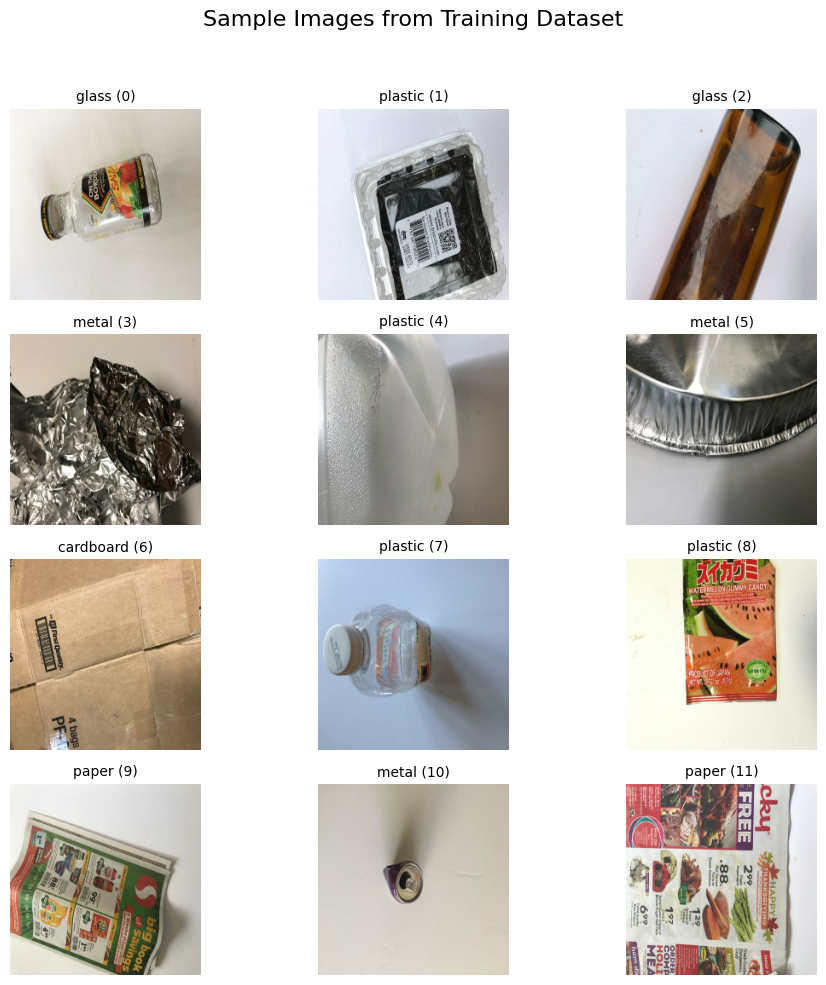

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    num_images = min(len(images), 12)
    for i in range(num_images):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{train_ds.class_names[labels[i]]} ({i})", fontsize=10)
        plt.axis("off")

plt.suptitle("Sample Images from Training Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust to make space for title
plt.show()


In [ ]:
📊 Step 5: Visualize Class Distributions
This cell:

Counts the number of images in each class (Train, Validation, Test) 📦
Calculates percentage distribution of each class
Displays a clean table and creates bar plots 📈 using Seaborn Helps us understand class imbalance (if any) before training the model ⚖️


Class Distribution Summary:

    Class  Train (%)  Validation (%)  Test (%)  Overall (%)
cardboard      16.52           13.66     14.06        15.09
    glass      19.73           20.20     17.58        19.96
    metal      15.92           17.43     16.80        16.68
    paper      23.29           24.36     25.00        23.82
  plastic      19.44           17.62     19.14        18.53
    trash       5.09            6.73      7.42         5.91


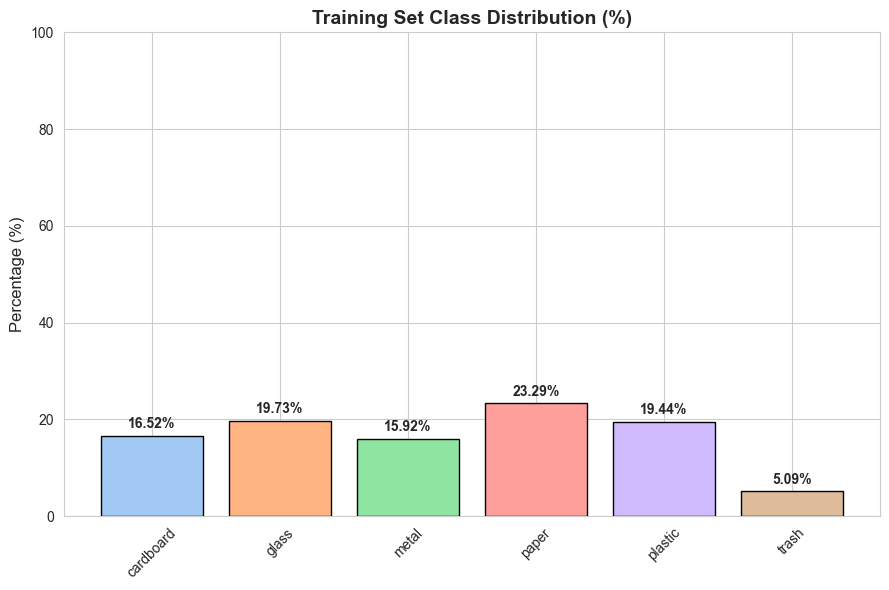

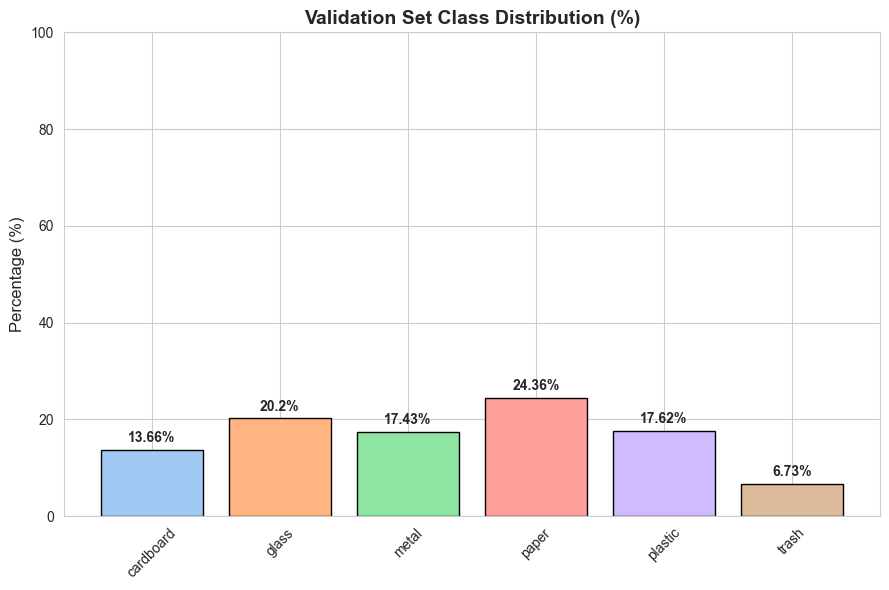

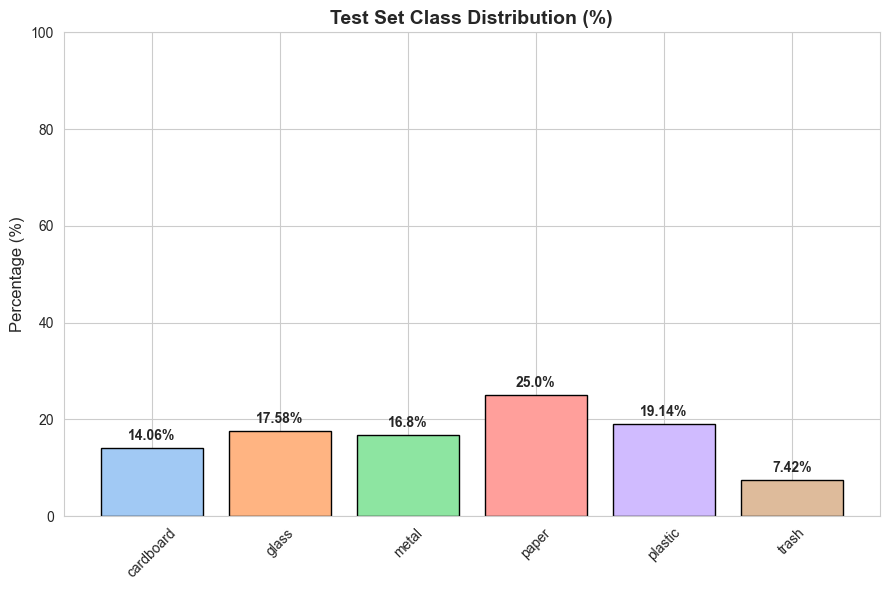

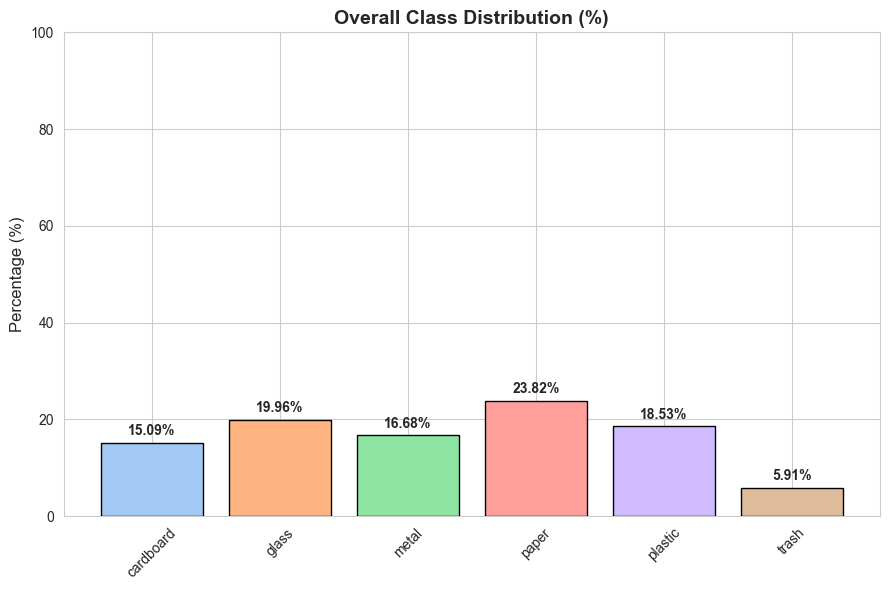

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Function to count class distribution (in %)
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}
    
    for _, labels in dataset:
        for label in labels.numpy():
            counts[class_names[label]] += 1
            total += 1

    return {k: round((v / total) * 100, 2) for k, v in counts.items()}

# Improved bar plot function with seaborn
def simple_bar_plot(dist, title):
    plt.figure(figsize=(9, 6))
    sns.set_style("whitegrid")
    
    bars = plt.bar(dist.keys(), dist.values(), color=sns.color_palette("pastel"), edgecolor='black')

    # Add value labels on top
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height}%',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

# Get class names
class_names = train_ds.class_names

# Compute distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)
overall_dist = {k: round((train_dist[k] + val_dist[k]) / 2, 2) for k in class_names}

# Create DataFrame
dist_df = pd.DataFrame({
    'Class': class_names,
    'Train (%)': [train_dist[k] for k in class_names],
    'Validation (%)': [val_dist[k] for k in class_names],
    'Test (%)': [test_dist[k] for k in class_names],
    'Overall (%)': [overall_dist[k] for k in class_names],
})

# Print clean table
print("\nClass Distribution Summary:\n")
print(dist_df.to_string(index=False))

# Plot distributions
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")


In [ ]:
### 🔄 Step 6: Data Augmentation  
Applies random image flips, rotations, etc.  
Helps improve generalization and reduce overfitting.  


In [8]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Count class occurrences and collect all labels
class_counts = {i: 0 for i in range(len(class_names))}
all_labels = []

for images, labels in train_ds:
    for label in labels.numpy():
        class_counts[label] += 1
        all_labels.append(label)

# Compute class weights (balanced)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=all_labels
)

# Map class index to weight
class_weights = {i: round(w, 4) for i, w in enumerate(class_weights_array)}

# ✨ Display results nicely
print("\n📊 Class Distribution in Training Set")
print("-" * 40)
for i, name in enumerate(class_names):
    print(f"{i}. {name:<10} ➤ Samples: {class_counts[i]:<4} | Weight: {class_weights[i]}")
print("-" * 40)
print(f"\n🧮 Total Training Samples: {sum(class_counts.values())}")



📊 Class Distribution in Training Set
----------------------------------------
0. cardboard  ➤ Samples: 334  | Weight: 1.009
1. glass      ➤ Samples: 399  | Weight: 0.8446
2. metal      ➤ Samples: 322  | Weight: 1.0466
3. paper      ➤ Samples: 471  | Weight: 0.7155
4. plastic    ➤ Samples: 393  | Weight: 0.8575
5. trash      ➤ Samples: 103  | Weight: 3.2718
----------------------------------------

🧮 Total Training Samples: 2022


### 🧱 Step 7: Define Model  
Using EfficientNetV2B2 (a pre-trained model) with some added layers.  
Helps transfer knowledge from other image datasets.
### ⏱️ Step 8: Define Callbacks  
Adds features like:
- Early stopping: stop if model stops improving.
- ModelCheckpoint: save the best version of model.
- 
### ⚙️ Step 9: Compile Model  
Define loss function, optimizer (Adam), and evaluation metric (accuracy).  




📦 Starting Model Training...
Epochs       : 15
Class Weights: {0: np.float64(1.009), 1: np.float64(0.8446), 2: np.float64(1.0466), 3: np.float64(0.7155), 4: np.float64(0.8575), 5: np.float64(3.2718)}
Checkpoint   : Best model saved to 'best_model224.keras'
Early Stop   : Enabled with patience=3



0epoch [00:00, ?epoch/s]
  0%|                                                                                        | 0/15 [00:00<?, ?epoch/s]
  0%|                                                                                   | 0.00/64.0 [00:00<?, ?batch/s]

Epoch 1/15



  2%|▊                                                | 1.00/64.0 [00:46<48:56, 46.6s/batch, accuracy=0.219, loss=1.97]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 49:03 47s/step - accuracy: 0.2188 - loss: 1.9668


  3%|█▌                                               | 2.00/64.0 [00:53<23:49, 23.1s/batch, accuracy=0.219, loss=1.74]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 6:39 6s/step - accuracy: 0.2188 - loss: 1.8521  


  5%|██▎                                              | 3.00/64.0 [00:58<15:25, 15.2s/batch, accuracy=0.219, loss=1.76]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 6:13 6s/step - accuracy: 0.2188 - loss: 1.8206


  6%|███                                              | 4.00/64.0 [01:04<11:23, 11.4s/batch, accuracy=0.195, loss=1.77]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:56 6s/step - accuracy: 0.2129 - loss: 1.8076


  8%|███▊                                             | 5.00/64.0 [01:10<09:12, 9.36s/batch, accuracy=0.206, loss=1.79]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:48 6s/step - accuracy: 0.2116 - loss: 1.8037


  9%|████▌                                            | 6.00/64.0 [01:15<07:46, 8.04s/batch, accuracy=0.203, loss=1.75]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:37 6s/step - accuracy: 0.2102 - loss: 1.7956


 11%|█████▎                                           | 7.00/64.0 [01:21<06:47, 7.16s/batch, accuracy=0.192, loss=1.81]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 5:26 6s/step - accuracy: 0.2076 - loss: 1.7978


 12%|██████▏                                          | 8.00/64.0 [01:26<06:06, 6.54s/batch, accuracy=0.203, loss=1.78]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 5:16 6s/step - accuracy: 0.2070 - loss: 1.7961


 14%|██████▉                                          | 9.00/64.0 [01:31<05:37, 6.14s/batch, accuracy=0.212, loss=1.77]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 5:08 6s/step - accuracy: 0.2075 - loss: 1.7931


 16%|███████▋                                         | 10.0/64.0 [01:36<05:17, 5.87s/batch, accuracy=0.231, loss=1.77]

10/64 ━━━━━━━━━━━━━━━━━━━━ 5:00 6s/step - accuracy: 0.2099 - loss: 1.7912


 17%|████████▍                                        | 11.0/64.0 [01:42<05:02, 5.70s/batch, accuracy=0.239, loss=1.78]

11/64 ━━━━━━━━━━━━━━━━━━━━ 4:53 6s/step - accuracy: 0.2125 - loss: 1.7901


 19%|█████████▏                                       | 12.0/64.0 [01:47<04:51, 5.60s/batch, accuracy=0.253, loss=1.79]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:47 6s/step - accuracy: 0.2159 - loss: 1.7902


 20%|█████████▉                                       | 13.0/64.0 [01:53<04:44, 5.59s/batch, accuracy=0.264, loss=1.77]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:42 6s/step - accuracy: 0.2196 - loss: 1.7886


 22%|██████████▋                                      | 14.0/64.0 [01:58<04:34, 5.49s/batch, accuracy=0.272, loss=1.75]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:35 6s/step - accuracy: 0.2234 - loss: 1.7856


 23%|███████████▍                                     | 15.0/64.0 [02:03<04:26, 5.44s/batch, accuracy=0.281, loss=1.73]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:29 5s/step - accuracy: 0.2272 - loss: 1.7816


 25%|████████████▎                                    | 16.0/64.0 [02:08<04:17, 5.35s/batch, accuracy=0.283, loss=1.71]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:22 5s/step - accuracy: 0.2307 - loss: 1.7773


 27%|█████████████▎                                    | 17.0/64.0 [02:14<04:09, 5.31s/batch, accuracy=0.285, loss=1.7]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:16 5s/step - accuracy: 0.2339 - loss: 1.7730


 28%|██████████████                                    | 18.0/64.0 [02:19<04:02, 5.28s/batch, accuracy=0.299, loss=1.7]

18/64 ━━━━━━━━━━━━━━━━━━━━ 4:10 5s/step - accuracy: 0.2375 - loss: 1.7687


 30%|██████████████▌                                  | 19.0/64.0 [02:24<03:55, 5.24s/batch, accuracy=0.301, loss=1.69]

19/64 ━━━━━━━━━━━━━━━━━━━━ 4:04 5s/step - accuracy: 0.2408 - loss: 1.7648


 31%|███████████████▎                                 | 20.0/64.0 [02:29<03:50, 5.24s/batch, accuracy=0.305, loss=1.68]

20/64 ━━━━━━━━━━━━━━━━━━━━ 3:58 5s/step - accuracy: 0.2440 - loss: 1.7603


 33%|████████████████                                 | 21.0/64.0 [02:34<03:42, 5.18s/batch, accuracy=0.312, loss=1.66]

21/64 ━━━━━━━━━━━━━━━━━━━━ 3:52 5s/step - accuracy: 0.2473 - loss: 1.7554


 34%|████████████████▊                                | 22.0/64.0 [02:39<03:38, 5.20s/batch, accuracy=0.324, loss=1.64]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:46 5s/step - accuracy: 0.2508 - loss: 1.7502


 36%|█████████████████▌                               | 23.0/64.0 [02:45<03:32, 5.18s/batch, accuracy=0.333, loss=1.62]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:40 5s/step - accuracy: 0.2543 - loss: 1.7446


 38%|██████████████████▍                              | 24.0/64.0 [02:50<03:30, 5.27s/batch, accuracy=0.345, loss=1.62]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:35 5s/step - accuracy: 0.2581 - loss: 1.7393


 39%|███████████████████▌                              | 25.0/64.0 [02:55<03:23, 5.22s/batch, accuracy=0.351, loss=1.6]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:29 5s/step - accuracy: 0.2619 - loss: 1.7339


 41%|███████████████████▉                             | 26.0/64.0 [03:01<03:20, 5.28s/batch, accuracy=0.352, loss=1.61]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:24 5s/step - accuracy: 0.2653 - loss: 1.7292


 42%|█████████████████████                             | 27.0/64.0 [03:06<03:14, 5.27s/batch, accuracy=0.354, loss=1.6]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:18 5s/step - accuracy: 0.2686 - loss: 1.7246


 44%|██████████████████████▎                            | 28.0/64.0 [03:11<03:08, 5.23s/batch, accuracy=0.36, loss=1.6]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:12 5s/step - accuracy: 0.2719 - loss: 1.7201


 45%|██████████████████████▏                          | 29.0/64.0 [03:16<03:02, 5.20s/batch, accuracy=0.372, loss=1.59]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:07 5s/step - accuracy: 0.2753 - loss: 1.7157


 47%|███████████████████████▍                          | 30.0/64.0 [03:21<02:56, 5.20s/batch, accuracy=0.377, loss=1.6]

30/64 ━━━━━━━━━━━━━━━━━━━━ 3:01 5s/step - accuracy: 0.2787 - loss: 1.7117


 48%|███████████████████████▋                         | 31.0/64.0 [03:26<02:51, 5.19s/batch, accuracy=0.388, loss=1.59]

31/64 ━━━━━━━━━━━━━━━━━━━━ 2:56 5s/step - accuracy: 0.2823 - loss: 1.7077


 50%|████████████████████████▌                        | 32.0/64.0 [03:32<02:44, 5.15s/batch, accuracy=0.391, loss=1.59]

32/64 ━━━━━━━━━━━━━━━━━━━━ 2:50 5s/step - accuracy: 0.2856 - loss: 1.7040


 52%|█████████████████████████▎                       | 33.0/64.0 [03:37<02:39, 5.15s/batch, accuracy=0.396, loss=1.59]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:45 5s/step - accuracy: 0.2890 - loss: 1.7006


 53%|██████████████████████████                       | 34.0/64.0 [03:42<02:35, 5.18s/batch, accuracy=0.402, loss=1.59]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:39 5s/step - accuracy: 0.2923 - loss: 1.6974


 55%|██████████████████████████▊                      | 35.0/64.0 [03:47<02:31, 5.24s/batch, accuracy=0.408, loss=1.59]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:34 5s/step - accuracy: 0.2956 - loss: 1.6943


 56%|███████████████████████████▌                     | 36.0/64.0 [03:52<02:26, 5.22s/batch, accuracy=0.411, loss=1.58]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:29 5s/step - accuracy: 0.2988 - loss: 1.6911


 58%|████████████████████████████▎                    | 37.0/64.0 [03:58<02:22, 5.27s/batch, accuracy=0.419, loss=1.57]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:23 5s/step - accuracy: 0.3021 - loss: 1.6879


 59%|█████████████████████████████                    | 38.0/64.0 [04:03<02:17, 5.28s/batch, accuracy=0.419, loss=1.57]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:18 5s/step - accuracy: 0.3052 - loss: 1.6847


 61%|██████████████████████████████▍                   | 39.0/64.0 [04:08<02:10, 5.21s/batch, accuracy=0.42, loss=1.57]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:12 5s/step - accuracy: 0.3081 - loss: 1.6817


 62%|██████████████████████████████▋                  | 40.0/64.0 [04:14<02:08, 5.34s/batch, accuracy=0.423, loss=1.56]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:07 5s/step - accuracy: 0.3110 - loss: 1.6788


 64%|███████████████████████████████▍                 | 41.0/64.0 [04:19<02:04, 5.40s/batch, accuracy=0.427, loss=1.56]

41/64 ━━━━━━━━━━━━━━━━━━━━ 2:02 5s/step - accuracy: 0.3138 - loss: 1.6759


 66%|████████████████████████████████▏                | 42.0/64.0 [04:26<02:06, 5.76s/batch, accuracy=0.431, loss=1.56]

42/64 ━━━━━━━━━━━━━━━━━━━━ 1:57 5s/step - accuracy: 0.3166 - loss: 1.6732


 67%|████████████████████████████████▉                | 43.0/64.0 [04:32<02:01, 5.77s/batch, accuracy=0.435, loss=1.55]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:52 5s/step - accuracy: 0.3194 - loss: 1.6703


 69%|█████████████████████████████████▋               | 44.0/64.0 [04:39<02:01, 6.07s/batch, accuracy=0.438, loss=1.55]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:48 5s/step - accuracy: 0.3221 - loss: 1.6675


 70%|██████████████████████████████████▍              | 45.0/64.0 [04:46<02:04, 6.54s/batch, accuracy=0.443, loss=1.54]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:43 5s/step - accuracy: 0.3247 - loss: 1.6646


 72%|███████████████████████████████████▏             | 46.0/64.0 [04:52<01:55, 6.43s/batch, accuracy=0.444, loss=1.54]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:38 5s/step - accuracy: 0.3273 - loss: 1.6619


 73%|███████████████████████████████████▉             | 47.0/64.0 [04:59<01:52, 6.59s/batch, accuracy=0.447, loss=1.54]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:33 6s/step - accuracy: 0.3299 - loss: 1.6592


 75%|████████████████████████████████████▊            | 48.0/64.0 [05:05<01:40, 6.28s/batch, accuracy=0.449, loss=1.53]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:28 6s/step - accuracy: 0.3324 - loss: 1.6565


 77%|█████████████████████████████████████▌           | 49.0/64.0 [05:10<01:30, 6.05s/batch, accuracy=0.456, loss=1.52]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:22 6s/step - accuracy: 0.3349 - loss: 1.6536


 78%|██████████████████████████████████████▎          | 50.0/64.0 [05:16<01:21, 5.80s/batch, accuracy=0.461, loss=1.51]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:16 5s/step - accuracy: 0.3374 - loss: 1.6507


 80%|███████████████████████████████████████▊          | 51.0/64.0 [05:21<01:13, 5.65s/batch, accuracy=0.466, loss=1.5]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:11 5s/step - accuracy: 0.3399 - loss: 1.6477


 81%|████████████████████████████████████████▋         | 52.0/64.0 [05:26<01:05, 5.46s/batch, accuracy=0.467, loss=1.5]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:05 5s/step - accuracy: 0.3424 - loss: 1.6448


 83%|████████████████████████████████████████▌        | 53.0/64.0 [05:31<00:59, 5.37s/batch, accuracy=0.473, loss=1.49]

53/64 ━━━━━━━━━━━━━━━━━━━━ 1:00 5s/step - accuracy: 0.3449 - loss: 1.6418


 84%|█████████████████████████████████████████▎       | 54.0/64.0 [05:36<00:53, 5.34s/batch, accuracy=0.475, loss=1.48]

54/64 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.3473 - loss: 1.6389 


 86%|██████████████████████████████████████████       | 55.0/64.0 [05:42<00:48, 5.41s/batch, accuracy=0.479, loss=1.48]

55/64 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.3497 - loss: 1.6359


 88%|██████████████████████████████████████████▉      | 56.0/64.0 [05:47<00:42, 5.34s/batch, accuracy=0.481, loss=1.47]

56/64 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.3520 - loss: 1.6330


 89%|███████████████████████████████████████████▋     | 57.0/64.0 [05:52<00:36, 5.27s/batch, accuracy=0.484, loss=1.46]

57/64 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.3543 - loss: 1.6300


 91%|█████████████████████████████████████████████▎    | 58.0/64.0 [05:57<00:31, 5.22s/batch, accuracy=0.49, loss=1.45]

58/64 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.3567 - loss: 1.6269


 92%|█████████████████████████████████████████████▏   | 59.0/64.0 [06:02<00:25, 5.15s/batch, accuracy=0.494, loss=1.45]

59/64 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.3590 - loss: 1.6239


 94%|█████████████████████████████████████████████▉   | 60.0/64.0 [06:07<00:20, 5.14s/batch, accuracy=0.498, loss=1.44]

60/64 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.3613 - loss: 1.6209


 95%|██████████████████████████████████████████████▋  | 61.0/64.0 [06:13<00:15, 5.16s/batch, accuracy=0.502, loss=1.44]

61/64 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.3636 - loss: 1.6179


 97%|███████████████████████████████████████████████▍ | 62.0/64.0 [06:18<00:10, 5.21s/batch, accuracy=0.505, loss=1.43]

62/64 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.3659 - loss: 1.6149


 98%|████████████████████████████████████████████████▏| 63.0/64.0 [06:23<00:05, 5.16s/batch, accuracy=0.507, loss=1.42]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3681 - loss: 1.6118 


100%|█████████████████████████████████████████████████| 64.0/64.0 [06:24<00:00, 3.95s/batch, accuracy=0.508, loss=1.42]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3703 - loss: 1.6088
Epoch 1: val_accuracy improved from -inf to 0.71287, saving model to best_model224.keras


  7%|▉             | 1/15 [06:55<1:36:59, 415.68s/epoch, accuracy=0.508, loss=1.42, val_accuracy=0.713, val_loss=0.971]

64/64 ━━━━━━━━━━━━━━━━━━━━ 416s 6s/step - accuracy: 0.3725 - loss: 1.6059 - val_accuracy: 0.7129 - val_loss: 0.9707



  0%|                                                        | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.508, loss=1.42]

Epoch 2/15



  2%|▊                                                | 1.00/64.0 [00:06<07:09, 6.82s/batch, accuracy=0.625, loss=1.06]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 7:09 7s/step - accuracy: 0.6250 - loss: 1.0606


  3%|█▌                                              | 2.00/64.0 [00:12<06:11, 5.98s/batch, accuracy=0.703, loss=0.907]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 5:34 5s/step - accuracy: 0.6641 - loss: 0.9837


  5%|██▎                                              | 3.00/64.0 [00:17<05:44, 5.65s/batch, accuracy=0.74, loss=0.883]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:24 5s/step - accuracy: 0.6892 - loss: 0.9503


  6%|███▏                                              | 4.00/64.0 [00:22<05:29, 5.50s/batch, accuracy=0.75, loss=0.87]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:18 5s/step - accuracy: 0.7044 - loss: 0.9301


  8%|███▊                                             | 5.00/64.0 [00:28<05:23, 5.48s/batch, accuracy=0.756, loss=0.87]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:14 5s/step - accuracy: 0.7148 - loss: 0.9182


  9%|████▌                                            | 6.00/64.0 [00:33<05:11, 5.37s/batch, accuracy=0.75, loss=0.896]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:07 5s/step - accuracy: 0.7207 - loss: 0.9144


 11%|█████▍                                            | 7.00/64.0 [00:38<05:03, 5.32s/batch, accuracy=0.746, loss=0.9]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 5:01 5s/step - accuracy: 0.7242 - loss: 0.9124


 12%|██████                                          | 8.00/64.0 [00:43<04:54, 5.25s/batch, accuracy=0.754, loss=0.897]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 4:54 5s/step - accuracy: 0.7279 - loss: 0.9104


 14%|██████▊                                         | 9.00/64.0 [00:48<04:48, 5.25s/batch, accuracy=0.767, loss=0.881]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 4:49 5s/step - accuracy: 0.7323 - loss: 0.9071


 16%|███████▌                                        | 10.0/64.0 [00:54<04:41, 5.21s/batch, accuracy=0.759, loss=0.878]

10/64 ━━━━━━━━━━━━━━━━━━━━ 4:43 5s/step - accuracy: 0.7350 - loss: 0.9042


 17%|████████▍                                        | 11.0/64.0 [00:59<04:34, 5.17s/batch, accuracy=0.761, loss=0.87]

11/64 ━━━━━━━━━━━━━━━━━━━━ 4:37 5s/step - accuracy: 0.7374 - loss: 0.9011


 19%|█████████                                       | 12.0/64.0 [01:04<04:29, 5.19s/batch, accuracy=0.768, loss=0.858]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:31 5s/step - accuracy: 0.7400 - loss: 0.8975


 20%|█████████▊                                      | 13.0/64.0 [01:09<04:23, 5.16s/batch, accuracy=0.769, loss=0.863]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:26 5s/step - accuracy: 0.7422 - loss: 0.8948


 22%|██████████▌                                     | 14.0/64.0 [01:14<04:20, 5.21s/batch, accuracy=0.759, loss=0.855]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:21 5s/step - accuracy: 0.7434 - loss: 0.8920


 23%|███████████▎                                    | 15.0/64.0 [01:19<04:13, 5.16s/batch, accuracy=0.758, loss=0.861]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:15 5s/step - accuracy: 0.7444 - loss: 0.8899


 25%|████████████▎                                    | 16.0/64.0 [01:25<04:08, 5.19s/batch, accuracy=0.764, loss=0.87]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:10 5s/step - accuracy: 0.7456 - loss: 0.8887


 27%|████████████▊                                   | 17.0/64.0 [01:30<04:02, 5.15s/batch, accuracy=0.763, loss=0.859]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:04 5s/step - accuracy: 0.7466 - loss: 0.8869


 28%|█████████████▌                                  | 18.0/64.0 [01:35<03:56, 5.14s/batch, accuracy=0.764, loss=0.867]

18/64 ━━━━━━━━━━━━━━━━━━━━ 3:59 5s/step - accuracy: 0.7476 - loss: 0.8858


 30%|██████████████▎                                 | 19.0/64.0 [01:40<03:52, 5.17s/batch, accuracy=0.765, loss=0.865]

19/64 ━━━━━━━━━━━━━━━━━━━━ 3:54 5s/step - accuracy: 0.7485 - loss: 0.8847


 31%|███████████████                                 | 20.0/64.0 [01:45<03:47, 5.16s/batch, accuracy=0.772, loss=0.851]

20/64 ━━━━━━━━━━━━━━━━━━━━ 3:48 5s/step - accuracy: 0.7497 - loss: 0.8830


 33%|███████████████▊                                | 21.0/64.0 [01:51<03:49, 5.33s/batch, accuracy=0.775, loss=0.842]

21/64 ━━━━━━━━━━━━━━━━━━━━ 3:44 5s/step - accuracy: 0.7509 - loss: 0.8811


 34%|████████████████▌                               | 22.0/64.0 [01:57<03:48, 5.44s/batch, accuracy=0.777, loss=0.835]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:40 5s/step - accuracy: 0.7521 - loss: 0.8790


 36%|█████████████████▎                              | 23.0/64.0 [02:02<03:44, 5.49s/batch, accuracy=0.783, loss=0.839]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:35 5s/step - accuracy: 0.7534 - loss: 0.8772


 38%|██████████████████                              | 24.0/64.0 [02:08<03:39, 5.48s/batch, accuracy=0.784, loss=0.829]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:30 5s/step - accuracy: 0.7547 - loss: 0.8752


 39%|██████████████████▊                             | 25.0/64.0 [02:13<03:32, 5.45s/batch, accuracy=0.781, loss=0.836]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:25 5s/step - accuracy: 0.7557 - loss: 0.8737


 41%|███████████████████▌                            | 26.0/64.0 [02:19<03:37, 5.72s/batch, accuracy=0.778, loss=0.835]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:22 5s/step - accuracy: 0.7566 - loss: 0.8722


 42%|████████████████████▎                           | 27.0/64.0 [02:26<03:37, 5.87s/batch, accuracy=0.771, loss=0.838]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:18 5s/step - accuracy: 0.7571 - loss: 0.8709


 44%|█████████████████████                           | 28.0/64.0 [02:31<03:28, 5.81s/batch, accuracy=0.772, loss=0.827]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:13 5s/step - accuracy: 0.7576 - loss: 0.8693


 45%|█████████████████████▊                          | 29.0/64.0 [02:37<03:20, 5.73s/batch, accuracy=0.772, loss=0.822]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:08 5s/step - accuracy: 0.7581 - loss: 0.8677


 47%|██████████████████████▌                         | 30.0/64.0 [02:42<03:12, 5.66s/batch, accuracy=0.768, loss=0.822]

30/64 ━━━━━━━━━━━━━━━━━━━━ 3:02 5s/step - accuracy: 0.7584 - loss: 0.8662


 48%|███████████████████████▎                        | 31.0/64.0 [02:48<03:05, 5.64s/batch, accuracy=0.763, loss=0.825]

31/64 ━━━━━━━━━━━━━━━━━━━━ 2:57 5s/step - accuracy: 0.7586 - loss: 0.8648


 50%|████████████████████████                        | 32.0/64.0 [02:53<02:58, 5.58s/batch, accuracy=0.758, loss=0.826]

32/64 ━━━━━━━━━━━━━━━━━━━━ 2:52 5s/step - accuracy: 0.7586 - loss: 0.8636


 52%|████████████████████████▊                       | 33.0/64.0 [02:59<02:52, 5.58s/batch, accuracy=0.759, loss=0.821]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:47 5s/step - accuracy: 0.7586 - loss: 0.8623


 53%|█████████████████████████▌                      | 34.0/64.0 [03:04<02:45, 5.50s/batch, accuracy=0.751, loss=0.829]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:41 5s/step - accuracy: 0.7583 - loss: 0.8613


 55%|██████████████████████████▊                      | 35.0/64.0 [03:09<02:37, 5.44s/batch, accuracy=0.75, loss=0.829]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:36 5s/step - accuracy: 0.7581 - loss: 0.8604


 56%|███████████████████████████▌                     | 36.0/64.0 [03:15<02:31, 5.40s/batch, accuracy=0.755, loss=0.82]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:30 5s/step - accuracy: 0.7580 - loss: 0.8593


 58%|███████████████████████████▊                    | 37.0/64.0 [03:20<02:25, 5.38s/batch, accuracy=0.756, loss=0.817]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:25 5s/step - accuracy: 0.7580 - loss: 0.8581


 59%|████████████████████████████▌                   | 38.0/64.0 [03:25<02:17, 5.28s/batch, accuracy=0.757, loss=0.814]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:19 5s/step - accuracy: 0.7579 - loss: 0.8570


 61%|█████████████████████████████▊                   | 39.0/64.0 [03:30<02:10, 5.22s/batch, accuracy=0.756, loss=0.81]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:14 5s/step - accuracy: 0.7579 - loss: 0.8558


 62%|██████████████████████████████                  | 40.0/64.0 [03:35<02:05, 5.21s/batch, accuracy=0.756, loss=0.809]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:08 5s/step - accuracy: 0.7579 - loss: 0.8546


 64%|███████████████████████████████▍                 | 41.0/64.0 [03:41<01:59, 5.21s/batch, accuracy=0.755, loss=0.81]

41/64 ━━━━━━━━━━━━━━━━━━━━ 2:03 5s/step - accuracy: 0.7578 - loss: 0.8535


 66%|███████████████████████████████▌                | 42.0/64.0 [03:46<01:55, 5.27s/batch, accuracy=0.757, loss=0.808]

42/64 ━━━━━━━━━━━━━━━━━━━━ 1:57 5s/step - accuracy: 0.7578 - loss: 0.8524


 67%|████████████████████████████████▎               | 43.0/64.0 [03:51<01:51, 5.29s/batch, accuracy=0.755, loss=0.808]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:52 5s/step - accuracy: 0.7577 - loss: 0.8514


 69%|█████████████████████████████████               | 44.0/64.0 [03:57<01:50, 5.52s/batch, accuracy=0.757, loss=0.801]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:47 5s/step - accuracy: 0.7577 - loss: 0.8503


 70%|█████████████████████████████████▊              | 45.0/64.0 [04:03<01:44, 5.49s/batch, accuracy=0.758, loss=0.799]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:42 5s/step - accuracy: 0.7577 - loss: 0.8491


 72%|███████████████████████████████████▏             | 46.0/64.0 [04:08<01:38, 5.49s/batch, accuracy=0.762, loss=0.79]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:36 5s/step - accuracy: 0.7578 - loss: 0.8478


 73%|███████████████████████████████████▎            | 47.0/64.0 [04:14<01:31, 5.39s/batch, accuracy=0.763, loss=0.784]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:31 5s/step - accuracy: 0.7579 - loss: 0.8465


 75%|████████████████████████████████████            | 48.0/64.0 [04:19<01:25, 5.36s/batch, accuracy=0.765, loss=0.782]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 0.7580 - loss: 0.8451


 77%|████████████████████████████████████▊           | 49.0/64.0 [04:24<01:20, 5.36s/batch, accuracy=0.766, loss=0.779]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 0.7582 - loss: 0.8438


 78%|█████████████████████████████████████▌          | 50.0/64.0 [04:30<01:15, 5.37s/batch, accuracy=0.767, loss=0.775]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.7584 - loss: 0.8424


 80%|██████████████████████████████████████▎         | 51.0/64.0 [04:35<01:08, 5.28s/batch, accuracy=0.767, loss=0.775]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:09 5s/step - accuracy: 0.7585 - loss: 0.8411


 81%|███████████████████████████████████████         | 52.0/64.0 [04:40<01:03, 5.30s/batch, accuracy=0.767, loss=0.773]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:04 5s/step - accuracy: 0.7587 - loss: 0.8398


 83%|████████████████████████████████████████▌        | 53.0/64.0 [04:45<00:58, 5.28s/batch, accuracy=0.769, loss=0.77]

53/64 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.7589 - loss: 0.8385 


 84%|████████████████████████████████████████▌       | 54.0/64.0 [04:50<00:52, 5.25s/batch, accuracy=0.769, loss=0.768]

54/64 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.7591 - loss: 0.8372


 86%|█████████████████████████████████████████▎      | 55.0/64.0 [04:56<00:47, 5.22s/batch, accuracy=0.769, loss=0.764]

55/64 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.7593 - loss: 0.8358


 88%|██████████████████████████████████████████      | 56.0/64.0 [05:01<00:41, 5.17s/batch, accuracy=0.769, loss=0.765]

56/64 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.7594 - loss: 0.8346


 89%|███████████████████████████████████████████▋     | 57.0/64.0 [05:06<00:36, 5.16s/batch, accuracy=0.77, loss=0.763]

57/64 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.7596 - loss: 0.8333


 91%|████████████████████████████████████████████▍    | 58.0/64.0 [05:11<00:31, 5.18s/batch, accuracy=0.77, loss=0.763]

58/64 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.7598 - loss: 0.8321


 92%|█████████████████████████████████████████████▏   | 59.0/64.0 [05:16<00:25, 5.16s/batch, accuracy=0.773, loss=0.76]

59/64 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.7600 - loss: 0.8309


 94%|█████████████████████████████████████████████   | 60.0/64.0 [05:21<00:20, 5.13s/batch, accuracy=0.773, loss=0.757]

60/64 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.7602 - loss: 0.8296


 95%|█████████████████████████████████████████████▊  | 61.0/64.0 [05:26<00:15, 5.12s/batch, accuracy=0.773, loss=0.757]

61/64 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.7604 - loss: 0.8285


 97%|██████████████████████████████████████████████▌ | 62.0/64.0 [05:31<00:10, 5.15s/batch, accuracy=0.774, loss=0.754]

62/64 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.7607 - loss: 0.8273


 98%|███████████████████████████████████████████████▎| 63.0/64.0 [05:36<00:05, 5.11s/batch, accuracy=0.773, loss=0.755]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7609 - loss: 0.8261 


100%|████████████████████████████████████████████████| 64.0/64.0 [05:38<00:00, 3.92s/batch, accuracy=0.773, loss=0.755]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7611 - loss: 0.8250
Epoch 2: val_accuracy improved from 0.71287 to 0.85149, saving model to best_model224.keras


 13%|█▋           | 2/15 [13:04<1:24:03, 387.96s/epoch, accuracy=0.773, loss=0.755, val_accuracy=0.851, val_loss=0.531]

64/64 ━━━━━━━━━━━━━━━━━━━━ 369s 6s/step - accuracy: 0.7612 - loss: 0.8239 - val_accuracy: 0.8515 - val_loss: 0.5315



  0%|                                                       | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.773, loss=0.755]

Epoch 3/15



  2%|▊                                               | 1.00/64.0 [00:06<06:53, 6.56s/batch, accuracy=0.875, loss=0.619]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 6:53 7s/step - accuracy: 0.8750 - loss: 0.6191


  3%|█▌                                               | 2.00/64.0 [00:12<06:28, 6.27s/batch, accuracy=0.891, loss=0.53]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 6:16 6s/step - accuracy: 0.8828 - loss: 0.5744


  5%|██▎                                             | 3.00/64.0 [00:18<06:13, 6.13s/batch, accuracy=0.875, loss=0.504]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 6:06 6s/step - accuracy: 0.8802 - loss: 0.5509


  6%|███                                             | 4.00/64.0 [00:24<05:52, 5.88s/batch, accuracy=0.852, loss=0.512]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:50 6s/step - accuracy: 0.8730 - loss: 0.5410


  8%|███▊                                             | 5.00/64.0 [00:29<05:41, 5.79s/batch, accuracy=0.85, loss=0.498]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:41 6s/step - accuracy: 0.8684 - loss: 0.5324


  9%|████▌                                           | 6.00/64.0 [00:35<05:43, 5.93s/batch, accuracy=0.854, loss=0.502]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:40 6s/step - accuracy: 0.8661 - loss: 0.5273


 11%|█████▎                                           | 7.00/64.0 [00:41<05:40, 5.97s/batch, accuracy=0.857, loss=0.49]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 5:36 6s/step - accuracy: 0.8648 - loss: 0.5220


 12%|██████                                          | 8.00/64.0 [00:48<05:44, 6.15s/batch, accuracy=0.859, loss=0.492]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 5:35 6s/step - accuracy: 0.8641 - loss: 0.5183


 14%|██████▉                                          | 9.00/64.0 [00:54<05:30, 6.02s/batch, accuracy=0.868, loss=0.48]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 5:27 6s/step - accuracy: 0.8645 - loss: 0.5140


 16%|███████▌                                        | 10.0/64.0 [00:59<05:20, 5.94s/batch, accuracy=0.875, loss=0.472]

10/64 ━━━━━━━━━━━━━━━━━━━━ 5:20 6s/step - accuracy: 0.8656 - loss: 0.5098


 17%|████████▎                                       | 11.0/64.0 [01:05<05:02, 5.71s/batch, accuracy=0.875, loss=0.462]

11/64 ━━━━━━━━━━━━━━━━━━━━ 5:10 6s/step - accuracy: 0.8664 - loss: 0.5055


 19%|█████████▏                                       | 12.0/64.0 [01:10<04:51, 5.60s/batch, accuracy=0.87, loss=0.466]

12/64 ━━━━━━━━━━━━━━━━━━━━ 5:02 6s/step - accuracy: 0.8667 - loss: 0.5022


 20%|█████████▊                                      | 13.0/64.0 [01:15<04:40, 5.49s/batch, accuracy=0.873, loss=0.461]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:54 6s/step - accuracy: 0.8672 - loss: 0.4990


 22%|██████████▌                                     | 14.0/64.0 [01:20<04:30, 5.41s/batch, accuracy=0.871, loss=0.468]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:46 6s/step - accuracy: 0.8674 - loss: 0.4968


 23%|███████████▎                                    | 15.0/64.0 [01:27<04:41, 5.75s/batch, accuracy=0.875, loss=0.461]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:43 6s/step - accuracy: 0.8679 - loss: 0.4944


 25%|████████████                                    | 16.0/64.0 [01:34<04:53, 6.11s/batch, accuracy=0.879, loss=0.453]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:41 6s/step - accuracy: 0.8686 - loss: 0.4918


 27%|████████████▊                                   | 17.0/64.0 [01:41<04:57, 6.34s/batch, accuracy=0.877, loss=0.449]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:38 6s/step - accuracy: 0.8691 - loss: 0.4893


 28%|█████████████▊                                   | 18.0/64.0 [01:47<04:46, 6.22s/batch, accuracy=0.877, loss=0.46]

18/64 ━━━━━━━━━━━━━━━━━━━━ 4:32 6s/step - accuracy: 0.8695 - loss: 0.4877


 30%|██████████████▌                                  | 19.0/64.0 [01:53<04:43, 6.30s/batch, accuracy=0.87, loss=0.461]

19/64 ━━━━━━━━━━━━━━━━━━━━ 4:28 6s/step - accuracy: 0.8695 - loss: 0.4863


 31%|███████████████                                 | 20.0/64.0 [02:00<04:39, 6.35s/batch, accuracy=0.867, loss=0.464]

20/64 ━━━━━━━━━━━━━━━━━━━━ 4:23 6s/step - accuracy: 0.8694 - loss: 0.4852


 33%|████████████████                                 | 21.0/64.0 [02:06<04:26, 6.21s/batch, accuracy=0.865, loss=0.47]

21/64 ━━━━━━━━━━━━━━━━━━━━ 4:17 6s/step - accuracy: 0.8692 - loss: 0.4844


 34%|████████████████▌                               | 22.0/64.0 [02:12<04:18, 6.15s/batch, accuracy=0.859, loss=0.476]

22/64 ━━━━━━━━━━━━━━━━━━━━ 4:11 6s/step - accuracy: 0.8688 - loss: 0.4840


 36%|█████████████████▎                              | 23.0/64.0 [02:17<04:04, 5.97s/batch, accuracy=0.857, loss=0.486]

23/64 ━━━━━━━━━━━━━━━━━━━━ 4:04 6s/step - accuracy: 0.8683 - loss: 0.4841


 38%|██████████████████                              | 24.0/64.0 [02:22<03:49, 5.73s/batch, accuracy=0.862, loss=0.481]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:57 6s/step - accuracy: 0.8680 - loss: 0.4840


 39%|██████████████████▊                             | 25.0/64.0 [02:27<03:35, 5.54s/batch, accuracy=0.866, loss=0.471]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:49 6s/step - accuracy: 0.8679 - loss: 0.4834


 41%|███████████████████▉                             | 26.0/64.0 [02:33<03:25, 5.41s/batch, accuracy=0.867, loss=0.47]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:42 6s/step - accuracy: 0.8679 - loss: 0.4829


 42%|████████████████████▋                            | 27.0/64.0 [02:38<03:16, 5.31s/batch, accuracy=0.866, loss=0.47]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:35 6s/step - accuracy: 0.8678 - loss: 0.4824


 44%|█████████████████████▍                           | 28.0/64.0 [02:43<03:10, 5.28s/batch, accuracy=0.863, loss=0.47]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:29 6s/step - accuracy: 0.8676 - loss: 0.4820


 45%|█████████████████████▊                          | 29.0/64.0 [02:48<03:02, 5.22s/batch, accuracy=0.865, loss=0.464]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:22 6s/step - accuracy: 0.8675 - loss: 0.4814


 47%|██████████████████████▌                         | 30.0/64.0 [02:53<02:56, 5.19s/batch, accuracy=0.861, loss=0.466]

30/64 ━━━━━━━━━━━━━━━━━━━━ 3:15 6s/step - accuracy: 0.8673 - loss: 0.4808


 48%|███████████████████████▎                        | 31.0/64.0 [02:58<02:50, 5.17s/batch, accuracy=0.862, loss=0.461]

31/64 ━━━━━━━━━━━━━━━━━━━━ 3:09 6s/step - accuracy: 0.8672 - loss: 0.4802


 50%|████████████████████████▌                        | 32.0/64.0 [03:03<02:45, 5.17s/batch, accuracy=0.86, loss=0.462]

32/64 ━━━━━━━━━━━━━━━━━━━━ 3:03 6s/step - accuracy: 0.8669 - loss: 0.4796


 52%|████████████████████████▊                       | 33.0/64.0 [03:09<02:41, 5.20s/batch, accuracy=0.861, loss=0.461]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:56 6s/step - accuracy: 0.8668 - loss: 0.4791


 53%|██████████████████████████                       | 34.0/64.0 [03:14<02:34, 5.16s/batch, accuracy=0.859, loss=0.46]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:50 6s/step - accuracy: 0.8665 - loss: 0.4785


 55%|██████████████████████████▎                     | 35.0/64.0 [03:19<02:30, 5.18s/batch, accuracy=0.861, loss=0.454]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:44 6s/step - accuracy: 0.8664 - loss: 0.4778


 56%|███████████████████████████                     | 36.0/64.0 [03:24<02:24, 5.14s/batch, accuracy=0.863, loss=0.449]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:38 6s/step - accuracy: 0.8663 - loss: 0.4770


 58%|████████████████████████████▎                    | 37.0/64.0 [03:29<02:18, 5.14s/batch, accuracy=0.862, loss=0.45]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:32 6s/step - accuracy: 0.8662 - loss: 0.4763


 59%|████████████████████████████▌                   | 38.0/64.0 [03:34<02:14, 5.16s/batch, accuracy=0.862, loss=0.451]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:26 6s/step - accuracy: 0.8661 - loss: 0.4756


 61%|█████████████████████████████▎                  | 39.0/64.0 [03:39<02:08, 5.15s/batch, accuracy=0.862, loss=0.448]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:20 6s/step - accuracy: 0.8660 - loss: 0.4749


 62%|██████████████████████████████                  | 40.0/64.0 [03:45<02:03, 5.14s/batch, accuracy=0.863, loss=0.447]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:14 6s/step - accuracy: 0.8659 - loss: 0.4742


 64%|██████████████████████████████▊                 | 41.0/64.0 [03:50<01:57, 5.12s/batch, accuracy=0.864, loss=0.446]

41/64 ━━━━━━━━━━━━━━━━━━━━ 2:08 6s/step - accuracy: 0.8659 - loss: 0.4735


 66%|███████████████████████████████▌                | 42.0/64.0 [03:55<01:52, 5.13s/batch, accuracy=0.864, loss=0.451]

42/64 ━━━━━━━━━━━━━━━━━━━━ 2:02 6s/step - accuracy: 0.8658 - loss: 0.4730


 67%|████████████████████████████████▎               | 43.0/64.0 [04:00<01:47, 5.13s/batch, accuracy=0.864, loss=0.447]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:56 6s/step - accuracy: 0.8658 - loss: 0.4724


 69%|█████████████████████████████████▋               | 44.0/64.0 [04:05<01:43, 5.16s/batch, accuracy=0.864, loss=0.45]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:51 6s/step - accuracy: 0.8657 - loss: 0.4719


 70%|█████████████████████████████████▊              | 45.0/64.0 [04:10<01:37, 5.15s/batch, accuracy=0.866, loss=0.446]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:45 6s/step - accuracy: 0.8657 - loss: 0.4713


 72%|██████████████████████████████████▌             | 46.0/64.0 [04:15<01:32, 5.15s/batch, accuracy=0.867, loss=0.444]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:39 6s/step - accuracy: 0.8657 - loss: 0.4707


 73%|███████████████████████████████████▎            | 47.0/64.0 [04:21<01:27, 5.16s/batch, accuracy=0.868, loss=0.445]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:34 6s/step - accuracy: 0.8658 - loss: 0.4702


 75%|████████████████████████████████████            | 48.0/64.0 [04:26<01:22, 5.15s/batch, accuracy=0.868, loss=0.444]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:28 6s/step - accuracy: 0.8658 - loss: 0.4697


 77%|████████████████████████████████████▊           | 49.0/64.0 [04:31<01:17, 5.15s/batch, accuracy=0.869, loss=0.442]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:22 6s/step - accuracy: 0.8659 - loss: 0.4691


 78%|█████████████████████████████████████▌          | 50.0/64.0 [04:36<01:11, 5.13s/batch, accuracy=0.869, loss=0.443]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:17 6s/step - accuracy: 0.8660 - loss: 0.4686


 80%|██████████████████████████████████████▎         | 51.0/64.0 [04:41<01:06, 5.14s/batch, accuracy=0.868, loss=0.445]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:11 6s/step - accuracy: 0.8660 - loss: 0.4681


 81%|███████████████████████████████████████         | 52.0/64.0 [04:46<01:01, 5.10s/batch, accuracy=0.864, loss=0.449]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:05 5s/step - accuracy: 0.8660 - loss: 0.4677


 83%|███████████████████████████████████████▊        | 53.0/64.0 [04:51<00:56, 5.12s/batch, accuracy=0.864, loss=0.446]

53/64 ━━━━━━━━━━━━━━━━━━━━ 1:00 5s/step - accuracy: 0.8659 - loss: 0.4673


 84%|████████████████████████████████████████▌       | 54.0/64.0 [04:56<00:50, 5.09s/batch, accuracy=0.863, loss=0.447]

54/64 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.8659 - loss: 0.4669 


 86%|█████████████████████████████████████████▎      | 55.0/64.0 [05:02<00:46, 5.11s/batch, accuracy=0.864, loss=0.447]

55/64 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.8658 - loss: 0.4666


 88%|██████████████████████████████████████████      | 56.0/64.0 [05:07<00:41, 5.23s/batch, accuracy=0.864, loss=0.447]

56/64 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.8658 - loss: 0.4662


 89%|██████████████████████████████████████████▊     | 57.0/64.0 [05:12<00:36, 5.17s/batch, accuracy=0.865, loss=0.445]

57/64 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.8658 - loss: 0.4658


 91%|███████████████████████████████████████████▌    | 58.0/64.0 [05:17<00:30, 5.16s/batch, accuracy=0.865, loss=0.444]

58/64 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.8658 - loss: 0.4655


 92%|████████████████████████████████████████████▎   | 59.0/64.0 [05:22<00:25, 5.15s/batch, accuracy=0.867, loss=0.441]

59/64 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.8658 - loss: 0.4650


 94%|█████████████████████████████████████████████   | 60.0/64.0 [05:27<00:20, 5.13s/batch, accuracy=0.866, loss=0.442]

60/64 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8658 - loss: 0.4647


 95%|█████████████████████████████████████████████▊  | 61.0/64.0 [05:33<00:15, 5.16s/batch, accuracy=0.865, loss=0.442]

61/64 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.8658 - loss: 0.4643


 97%|███████████████████████████████████████████████▍ | 62.0/64.0 [05:38<00:10, 5.27s/batch, accuracy=0.866, loss=0.44]

62/64 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.8658 - loss: 0.4639


 98%|███████████████████████████████████████████████▎| 63.0/64.0 [05:44<00:05, 5.38s/batch, accuracy=0.867, loss=0.437]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8658 - loss: 0.4635 


100%|████████████████████████████████████████████████| 64.0/64.0 [05:45<00:00, 4.17s/batch, accuracy=0.867, loss=0.438]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8658 - loss: 0.4631
Epoch 3: val_accuracy improved from 0.85149 to 0.89505, saving model to best_model224.keras


 20%|██▌          | 3/15 [19:15<1:16:04, 380.40s/epoch, accuracy=0.867, loss=0.438, val_accuracy=0.895, val_loss=0.367]

64/64 ━━━━━━━━━━━━━━━━━━━━ 371s 6s/step - accuracy: 0.8659 - loss: 0.4627 - val_accuracy: 0.8950 - val_loss: 0.3666



  0%|                                                       | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.867, loss=0.438]

Epoch 4/15



  2%|▊                                               | 1.00/64.0 [00:06<06:18, 6.01s/batch, accuracy=0.906, loss=0.347]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 6:18 6s/step - accuracy: 0.9062 - loss: 0.3469


  3%|█▌                                              | 2.00/64.0 [00:11<05:46, 5.58s/batch, accuracy=0.906, loss=0.351]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 5:27 5s/step - accuracy: 0.9062 - loss: 0.3491


  5%|██▎                                              | 3.00/64.0 [00:16<05:32, 5.46s/batch, accuracy=0.917, loss=0.31]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:23 5s/step - accuracy: 0.9097 - loss: 0.3361


  6%|███                                              | 4.00/64.0 [00:21<05:22, 5.37s/batch, accuracy=0.93, loss=0.296]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:16 5s/step - accuracy: 0.9147 - loss: 0.3261


  8%|███▊                                            | 5.00/64.0 [00:26<05:11, 5.28s/batch, accuracy=0.931, loss=0.275]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:09 5s/step - accuracy: 0.9180 - loss: 0.3159


  9%|████▌                                           | 6.00/64.0 [00:32<05:08, 5.32s/batch, accuracy=0.922, loss=0.278]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:05 5s/step - accuracy: 0.9187 - loss: 0.3095


 11%|█████▎                                          | 7.00/64.0 [00:37<05:01, 5.28s/batch, accuracy=0.915, loss=0.292]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 4:59 5s/step - accuracy: 0.9182 - loss: 0.3070


 12%|██████                                          | 8.00/64.0 [00:42<04:53, 5.25s/batch, accuracy=0.922, loss=0.286]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 4:53 5s/step - accuracy: 0.9186 - loss: 0.3044


 14%|██████▊                                         | 9.00/64.0 [00:47<04:45, 5.19s/batch, accuracy=0.917, loss=0.303]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 4:47 5s/step - accuracy: 0.9184 - loss: 0.3043


 16%|███████▌                                        | 10.0/64.0 [00:52<04:40, 5.19s/batch, accuracy=0.919, loss=0.304]

10/64 ━━━━━━━━━━━━━━━━━━━━ 4:41 5s/step - accuracy: 0.9184 - loss: 0.3042


 17%|████████▍                                        | 11.0/64.0 [00:58<04:41, 5.31s/batch, accuracy=0.92, loss=0.296]

11/64 ━━━━━━━━━━━━━━━━━━━━ 4:38 5s/step - accuracy: 0.9186 - loss: 0.3035


 19%|█████████                                       | 12.0/64.0 [01:04<04:40, 5.39s/batch, accuracy=0.919, loss=0.307]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:34 5s/step - accuracy: 0.9187 - loss: 0.3038


 20%|█████████▊                                      | 13.0/64.0 [01:09<04:30, 5.31s/batch, accuracy=0.916, loss=0.302]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:28 5s/step - accuracy: 0.9185 - loss: 0.3036


 22%|██████████▌                                     | 14.0/64.0 [01:14<04:29, 5.39s/batch, accuracy=0.913, loss=0.305]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:24 5s/step - accuracy: 0.9181 - loss: 0.3037


 23%|███████████▎                                    | 15.0/64.0 [01:20<04:25, 5.41s/batch, accuracy=0.908, loss=0.305]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:20 5s/step - accuracy: 0.9174 - loss: 0.3038


 25%|████████████▎                                    | 16.0/64.0 [01:26<04:37, 5.78s/batch, accuracy=0.91, loss=0.304]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:18 5s/step - accuracy: 0.9170 - loss: 0.3039


 27%|████████████▊                                   | 17.0/64.0 [01:33<04:44, 6.06s/batch, accuracy=0.914, loss=0.301]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:17 5s/step - accuracy: 0.9168 - loss: 0.3037


 28%|█████████████▌                                  | 18.0/64.0 [01:39<04:42, 6.14s/batch, accuracy=0.915, loss=0.296]

18/64 ━━━━━━━━━━━━━━━━━━━━ 4:14 6s/step - accuracy: 0.9167 - loss: 0.3033


 30%|██████████████▎                                 | 19.0/64.0 [01:46<04:45, 6.34s/batch, accuracy=0.919, loss=0.291]

19/64 ━━━━━━━━━━━━━━━━━━━━ 4:11 6s/step - accuracy: 0.9168 - loss: 0.3026


 31%|███████████████                                 | 20.0/64.0 [01:53<04:44, 6.46s/batch, accuracy=0.909, loss=0.301]

20/64 ━━━━━━━━━━━━━━━━━━━━ 4:08 6s/step - accuracy: 0.9164 - loss: 0.3025


 33%|███████████████▊                                | 21.0/64.0 [01:59<04:30, 6.29s/batch, accuracy=0.912, loss=0.295]

21/64 ━━━━━━━━━━━━━━━━━━━━ 4:03 6s/step - accuracy: 0.9162 - loss: 0.3022


 34%|████████████████▌                               | 22.0/64.0 [02:04<04:15, 6.07s/batch, accuracy=0.911, loss=0.294]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:57 6s/step - accuracy: 0.9160 - loss: 0.3018


 36%|█████████████████▎                              | 23.0/64.0 [02:10<04:00, 5.85s/batch, accuracy=0.909, loss=0.296]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:51 6s/step - accuracy: 0.9157 - loss: 0.3016


 38%|██████████████████                              | 24.0/64.0 [02:15<03:48, 5.71s/batch, accuracy=0.911, loss=0.292]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:45 6s/step - accuracy: 0.9155 - loss: 0.3012


 39%|███████████████████▏                             | 25.0/64.0 [02:20<03:36, 5.56s/batch, accuracy=0.91, loss=0.296]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:39 6s/step - accuracy: 0.9153 - loss: 0.3009


 41%|███████████████████▌                            | 26.0/64.0 [02:26<03:28, 5.49s/batch, accuracy=0.909, loss=0.295]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:33 6s/step - accuracy: 0.9150 - loss: 0.3007


 42%|█████████████████████                             | 27.0/64.0 [02:31<03:19, 5.40s/batch, accuracy=0.91, loss=0.29]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:26 6s/step - accuracy: 0.9148 - loss: 0.3003


 44%|█████████████████████▍                           | 28.0/64.0 [02:36<03:11, 5.31s/batch, accuracy=0.91, loss=0.288]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:20 6s/step - accuracy: 0.9146 - loss: 0.2998


 45%|█████████████████████▊                          | 29.0/64.0 [02:41<03:05, 5.30s/batch, accuracy=0.906, loss=0.294]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:14 6s/step - accuracy: 0.9144 - loss: 0.2996


 47%|██████████████████████▌                         | 30.0/64.0 [02:46<02:57, 5.23s/batch, accuracy=0.907, loss=0.292]

30/64 ━━━━━━━━━━━━━━━━━━━━ 3:08 6s/step - accuracy: 0.9141 - loss: 0.2994


 48%|███████████████████████▋                         | 31.0/64.0 [02:51<02:51, 5.20s/batch, accuracy=0.908, loss=0.29]

31/64 ━━━━━━━━━━━━━━━━━━━━ 3:02 6s/step - accuracy: 0.9139 - loss: 0.2991


 50%|████████████████████████                        | 32.0/64.0 [02:57<02:46, 5.22s/batch, accuracy=0.907, loss=0.286]

32/64 ━━━━━━━━━━━━━━━━━━━━ 2:56 6s/step - accuracy: 0.9137 - loss: 0.2987


 52%|████████████████████████▊                       | 33.0/64.0 [03:02<02:41, 5.20s/batch, accuracy=0.908, loss=0.284]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:50 6s/step - accuracy: 0.9135 - loss: 0.2983


 53%|█████████████████████████▌                      | 34.0/64.0 [03:07<02:34, 5.16s/batch, accuracy=0.909, loss=0.283]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:44 5s/step - accuracy: 0.9134 - loss: 0.2978


 55%|██████████████████████████▊                      | 35.0/64.0 [03:12<02:30, 5.19s/batch, accuracy=0.911, loss=0.28]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:39 5s/step - accuracy: 0.9133 - loss: 0.2973


 56%|███████████████████████████                     | 36.0/64.0 [03:17<02:24, 5.17s/batch, accuracy=0.911, loss=0.279]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:33 5s/step - accuracy: 0.9133 - loss: 0.2968


 58%|████████████████████████████▎                    | 37.0/64.0 [03:22<02:18, 5.14s/batch, accuracy=0.911, loss=0.28]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:27 5s/step - accuracy: 0.9132 - loss: 0.2963


 59%|████████████████████████████▌                   | 38.0/64.0 [03:28<02:14, 5.19s/batch, accuracy=0.913, loss=0.281]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:22 5s/step - accuracy: 0.9132 - loss: 0.2959


 61%|█████████████████████████████▎                  | 39.0/64.0 [03:33<02:08, 5.16s/batch, accuracy=0.913, loss=0.281]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:16 5s/step - accuracy: 0.9132 - loss: 0.2956


 62%|██████████████████████████████▋                  | 40.0/64.0 [03:38<02:03, 5.16s/batch, accuracy=0.914, loss=0.28]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:10 5s/step - accuracy: 0.9132 - loss: 0.2952


 64%|██████████████████████████████▊                 | 41.0/64.0 [03:43<01:58, 5.14s/batch, accuracy=0.915, loss=0.281]

41/64 ━━━━━━━━━━━━━━━━━━━━ 2:05 5s/step - accuracy: 0.9133 - loss: 0.2948


 66%|███████████████████████████████▌                | 42.0/64.0 [03:48<01:53, 5.17s/batch, accuracy=0.916, loss=0.281]

42/64 ━━━━━━━━━━━━━━━━━━━━ 1:59 5s/step - accuracy: 0.9133 - loss: 0.2945


 67%|████████████████████████████████▎               | 43.0/64.0 [03:53<01:48, 5.17s/batch, accuracy=0.916, loss=0.279]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:53 5s/step - accuracy: 0.9134 - loss: 0.2941


 69%|█████████████████████████████████               | 44.0/64.0 [03:59<01:46, 5.35s/batch, accuracy=0.916, loss=0.278]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:48 5s/step - accuracy: 0.9135 - loss: 0.2938


 70%|█████████████████████████████████▊              | 45.0/64.0 [04:05<01:41, 5.33s/batch, accuracy=0.917, loss=0.277]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:43 5s/step - accuracy: 0.9135 - loss: 0.2934


 72%|██████████████████████████████████▌             | 46.0/64.0 [04:10<01:34, 5.27s/batch, accuracy=0.917, loss=0.275]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:37 5s/step - accuracy: 0.9136 - loss: 0.2930


 73%|███████████████████████████████████▎            | 47.0/64.0 [04:15<01:29, 5.26s/batch, accuracy=0.918, loss=0.272]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:32 5s/step - accuracy: 0.9137 - loss: 0.2925


 75%|████████████████████████████████████            | 48.0/64.0 [04:20<01:23, 5.25s/batch, accuracy=0.917, loss=0.274]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:26 5s/step - accuracy: 0.9138 - loss: 0.2922


 77%|████████████████████████████████████▊           | 49.0/64.0 [04:25<01:18, 5.23s/batch, accuracy=0.917, loss=0.274]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:21 5s/step - accuracy: 0.9139 - loss: 0.2918


 78%|█████████████████████████████████████▌          | 50.0/64.0 [04:30<01:13, 5.22s/batch, accuracy=0.915, loss=0.275]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.9139 - loss: 0.2914


 80%|██████████████████████████████████████▎         | 51.0/64.0 [04:36<01:08, 5.25s/batch, accuracy=0.914, loss=0.276]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:10 5s/step - accuracy: 0.9139 - loss: 0.2912


 81%|███████████████████████████████████████         | 52.0/64.0 [04:41<01:02, 5.19s/batch, accuracy=0.912, loss=0.279]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:04 5s/step - accuracy: 0.9138 - loss: 0.2909


 83%|███████████████████████████████████████▊        | 53.0/64.0 [04:46<00:56, 5.16s/batch, accuracy=0.913, loss=0.276]

53/64 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.9138 - loss: 0.2906 


 84%|████████████████████████████████████████▌       | 54.0/64.0 [04:51<00:51, 5.15s/batch, accuracy=0.913, loss=0.275]

54/64 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9138 - loss: 0.2903


 86%|█████████████████████████████████████████▎      | 55.0/64.0 [04:56<00:46, 5.14s/batch, accuracy=0.913, loss=0.273]

55/64 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.9138 - loss: 0.2900


 88%|██████████████████████████████████████████      | 56.0/64.0 [05:01<00:40, 5.11s/batch, accuracy=0.912, loss=0.274]

56/64 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9137 - loss: 0.2897


 89%|██████████████████████████████████████████▊     | 57.0/64.0 [05:06<00:35, 5.07s/batch, accuracy=0.912, loss=0.276]

57/64 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.9137 - loss: 0.2895


 91%|███████████████████████████████████████████▌    | 58.0/64.0 [05:11<00:30, 5.08s/batch, accuracy=0.912, loss=0.278]

58/64 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.9137 - loss: 0.2893


 92%|████████████████████████████████████████████▎   | 59.0/64.0 [05:16<00:25, 5.06s/batch, accuracy=0.912, loss=0.277]

59/64 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.9136 - loss: 0.2891


 94%|█████████████████████████████████████████████   | 60.0/64.0 [05:21<00:20, 5.07s/batch, accuracy=0.911, loss=0.278]

60/64 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.9136 - loss: 0.2889


 95%|██████████████████████████████████████████████▋  | 61.0/64.0 [05:26<00:15, 5.05s/batch, accuracy=0.91, loss=0.282]

61/64 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.9135 - loss: 0.2888


 97%|███████████████████████████████████████████████▍ | 62.0/64.0 [05:32<00:10, 5.13s/batch, accuracy=0.91, loss=0.281]

62/64 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9135 - loss: 0.2887


 98%|█████████████████████████████████████████████████▏| 63.0/64.0 [05:37<00:05, 5.15s/batch, accuracy=0.91, loss=0.28]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9134 - loss: 0.2885 


100%|██████████████████████████████████████████████████| 64.0/64.0 [05:38<00:00, 3.93s/batch, accuracy=0.91, loss=0.28]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9134 - loss: 0.2884
Epoch 4: val_accuracy improved from 0.89505 to 0.90099, saving model to best_model224.keras


 27%|████           | 4/15 [25:18<1:08:29, 373.58s/epoch, accuracy=0.91, loss=0.28, val_accuracy=0.901, val_loss=0.287]

64/64 ━━━━━━━━━━━━━━━━━━━━ 363s 6s/step - accuracy: 0.9133 - loss: 0.2883 - val_accuracy: 0.9010 - val_loss: 0.2871



  0%|                                                         | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.91, loss=0.28]

Epoch 5/15



  2%|▊                                                  | 1.00/64.0 [00:05<05:58, 5.69s/batch, accuracy=1, loss=0.0722]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 5:58 6s/step - accuracy: 1.0000 - loss: 0.0722


  3%|█▌                                              | 2.00/64.0 [00:10<05:28, 5.30s/batch, accuracy=0.953, loss=0.121]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 5:11 5s/step - accuracy: 0.9766 - loss: 0.0965


  5%|██▎                                             | 3.00/64.0 [00:15<05:22, 5.28s/batch, accuracy=0.969, loss=0.124]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:13 5s/step - accuracy: 0.9740 - loss: 0.1058


  6%|███                                             | 4.00/64.0 [00:21<05:12, 5.21s/batch, accuracy=0.969, loss=0.147]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:07 5s/step - accuracy: 0.9727 - loss: 0.1160


  8%|███▊                                            | 5.00/64.0 [00:26<05:06, 5.19s/batch, accuracy=0.969, loss=0.154]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:03 5s/step - accuracy: 0.9719 - loss: 0.1236


  9%|████▌                                           | 6.00/64.0 [00:31<04:58, 5.14s/batch, accuracy=0.964, loss=0.164]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 4:56 5s/step - accuracy: 0.9705 - loss: 0.1302


 11%|█████▎                                          | 7.00/64.0 [00:37<05:05, 5.36s/batch, accuracy=0.955, loss=0.167]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - accuracy: 0.9683 - loss: 0.1356


 12%|██████                                          | 8.00/64.0 [00:42<05:05, 5.46s/batch, accuracy=0.953, loss=0.167]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 4:56 5s/step - accuracy: 0.9664 - loss: 0.1394


 14%|██████▊                                         | 9.00/64.0 [00:47<04:52, 5.32s/batch, accuracy=0.948, loss=0.177]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 4:49 5s/step - accuracy: 0.9644 - loss: 0.1437


 16%|███████▌                                        | 10.0/64.0 [00:52<04:43, 5.25s/batch, accuracy=0.934, loss=0.192]

10/64 ━━━━━━━━━━━━━━━━━━━━ 4:43 5s/step - accuracy: 0.9614 - loss: 0.1485


 17%|████████▎                                       | 11.0/64.0 [00:57<04:35, 5.20s/batch, accuracy=0.932, loss=0.189]

11/64 ━━━━━━━━━━━━━━━━━━━━ 4:37 5s/step - accuracy: 0.9587 - loss: 0.1522


 19%|█████████                                       | 12.0/64.0 [01:03<04:29, 5.18s/batch, accuracy=0.935, loss=0.186]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:31 5s/step - accuracy: 0.9567 - loss: 0.1550


 20%|█████████▊                                      | 13.0/64.0 [01:08<04:23, 5.16s/batch, accuracy=0.935, loss=0.196]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:25 5s/step - accuracy: 0.9550 - loss: 0.1582


 22%|██████████▌                                     | 14.0/64.0 [01:13<04:17, 5.15s/batch, accuracy=0.938, loss=0.191]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:20 5s/step - accuracy: 0.9538 - loss: 0.1605


 23%|███████████▍                                     | 15.0/64.0 [01:18<04:10, 5.12s/batch, accuracy=0.94, loss=0.194]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:14 5s/step - accuracy: 0.9528 - loss: 0.1628


 25%|████████████                                    | 16.0/64.0 [01:23<04:05, 5.11s/batch, accuracy=0.939, loss=0.197]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:08 5s/step - accuracy: 0.9520 - loss: 0.1649


 27%|████████████▊                                   | 17.0/64.0 [01:28<04:02, 5.16s/batch, accuracy=0.941, loss=0.203]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:03 5s/step - accuracy: 0.9514 - loss: 0.1672


 28%|█████████████▌                                  | 18.0/64.0 [01:33<03:57, 5.17s/batch, accuracy=0.938, loss=0.216]

18/64 ━━━━━━━━━━━━━━━━━━━━ 3:58 5s/step - accuracy: 0.9506 - loss: 0.1699


 30%|██████████████▎                                 | 19.0/64.0 [01:39<03:51, 5.14s/batch, accuracy=0.938, loss=0.214]

19/64 ━━━━━━━━━━━━━━━━━━━━ 3:53 5s/step - accuracy: 0.9499 - loss: 0.1722


 31%|███████████████                                 | 20.0/64.0 [01:44<03:44, 5.11s/batch, accuracy=0.938, loss=0.217]

20/64 ━━━━━━━━━━━━━━━━━━━━ 3:47 5s/step - accuracy: 0.9493 - loss: 0.1744


 33%|███████████████▊                                | 21.0/64.0 [01:49<03:40, 5.14s/batch, accuracy=0.938, loss=0.216]

21/64 ━━━━━━━━━━━━━━━━━━━━ 3:42 5s/step - accuracy: 0.9487 - loss: 0.1764


 34%|████████████████▊                                | 22.0/64.0 [01:54<03:38, 5.21s/batch, accuracy=0.94, loss=0.214]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:37 5s/step - accuracy: 0.9483 - loss: 0.1781


 36%|█████████████████▎                              | 23.0/64.0 [01:59<03:32, 5.18s/batch, accuracy=0.938, loss=0.215]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:32 5s/step - accuracy: 0.9479 - loss: 0.1797


 38%|██████████████████                              | 24.0/64.0 [02:04<03:27, 5.18s/batch, accuracy=0.939, loss=0.215]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:27 5s/step - accuracy: 0.9475 - loss: 0.1812


 39%|███████████████████▏                             | 25.0/64.0 [02:10<03:22, 5.18s/batch, accuracy=0.94, loss=0.211]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:22 5s/step - accuracy: 0.9472 - loss: 0.1824


 41%|███████████████████▉                             | 26.0/64.0 [02:15<03:15, 5.16s/batch, accuracy=0.941, loss=0.21]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:16 5s/step - accuracy: 0.9470 - loss: 0.1835


 42%|█████████████████████                             | 27.0/64.0 [02:20<03:14, 5.26s/batch, accuracy=0.94, loss=0.21]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:12 5s/step - accuracy: 0.9467 - loss: 0.1845


 44%|█████████████████████                           | 28.0/64.0 [02:26<03:10, 5.29s/batch, accuracy=0.939, loss=0.213]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:07 5s/step - accuracy: 0.9464 - loss: 0.1855


 45%|█████████████████████▊                          | 29.0/64.0 [02:31<03:03, 5.25s/batch, accuracy=0.939, loss=0.216]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:01 5s/step - accuracy: 0.9461 - loss: 0.1865


 47%|██████████████████████▌                         | 30.0/64.0 [02:36<03:00, 5.31s/batch, accuracy=0.939, loss=0.214]

30/64 ━━━━━━━━━━━━━━━━━━━━ 2:57 5s/step - accuracy: 0.9459 - loss: 0.1874


 48%|███████████████████████▎                        | 31.0/64.0 [02:41<02:55, 5.30s/batch, accuracy=0.935, loss=0.219]

31/64 ━━━━━━━━━━━━━━━━━━━━ 2:51 5s/step - accuracy: 0.9455 - loss: 0.1885


 50%|████████████████████████                        | 32.0/64.0 [02:47<02:48, 5.27s/batch, accuracy=0.938, loss=0.214]

32/64 ━━━━━━━━━━━━━━━━━━━━ 2:46 5s/step - accuracy: 0.9453 - loss: 0.1893


 52%|████████████████████████▊                       | 33.0/64.0 [02:52<02:41, 5.22s/batch, accuracy=0.937, loss=0.217]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:41 5s/step - accuracy: 0.9450 - loss: 0.1901


 53%|██████████████████████████                       | 34.0/64.0 [02:57<02:35, 5.19s/batch, accuracy=0.937, loss=0.22]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:36 5s/step - accuracy: 0.9448 - loss: 0.1910


 55%|██████████████████████████▎                     | 35.0/64.0 [03:02<02:29, 5.17s/batch, accuracy=0.936, loss=0.222]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:30 5s/step - accuracy: 0.9445 - loss: 0.1919


 56%|███████████████████████████                     | 36.0/64.0 [03:07<02:26, 5.23s/batch, accuracy=0.936, loss=0.221]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:25 5s/step - accuracy: 0.9443 - loss: 0.1927


 58%|████████████████████████████▎                    | 37.0/64.0 [03:13<02:22, 5.28s/batch, accuracy=0.936, loss=0.22]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:20 5s/step - accuracy: 0.9441 - loss: 0.1934


 59%|████████████████████████████▌                   | 38.0/64.0 [03:18<02:17, 5.27s/batch, accuracy=0.937, loss=0.219]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:15 5s/step - accuracy: 0.9439 - loss: 0.1941


 61%|█████████████████████████████▎                  | 39.0/64.0 [03:23<02:12, 5.28s/batch, accuracy=0.938, loss=0.217]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:10 5s/step - accuracy: 0.9437 - loss: 0.1947


 62%|██████████████████████████████                  | 40.0/64.0 [03:28<02:05, 5.23s/batch, accuracy=0.938, loss=0.217]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:05 5s/step - accuracy: 0.9436 - loss: 0.1952


 64%|██████████████████████████████▊                 | 41.0/64.0 [03:34<01:59, 5.20s/batch, accuracy=0.939, loss=0.214]

41/64 ━━━━━━━━━━━━━━━━━━━━ 1:59 5s/step - accuracy: 0.9434 - loss: 0.1957


 66%|███████████████████████████████▌                | 42.0/64.0 [03:39<01:53, 5.16s/batch, accuracy=0.938, loss=0.216]

42/64 ━━━━━━━━━━━━━━━━━━━━ 1:54 5s/step - accuracy: 0.9433 - loss: 0.1962


 67%|████████████████████████████████▎               | 43.0/64.0 [03:44<01:48, 5.19s/batch, accuracy=0.939, loss=0.214]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:49 5s/step - accuracy: 0.9432 - loss: 0.1966


 69%|█████████████████████████████████               | 44.0/64.0 [03:49<01:44, 5.20s/batch, accuracy=0.939, loss=0.214]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:44 5s/step - accuracy: 0.9431 - loss: 0.1970


 70%|██████████████████████████████████▍              | 45.0/64.0 [03:54<01:39, 5.21s/batch, accuracy=0.94, loss=0.212]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:38 5s/step - accuracy: 0.9431 - loss: 0.1973


 72%|██████████████████████████████████▌             | 46.0/64.0 [03:59<01:33, 5.18s/batch, accuracy=0.941, loss=0.211]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:33 5s/step - accuracy: 0.9430 - loss: 0.1976


 73%|███████████████████████████████████▎            | 47.0/64.0 [04:06<01:34, 5.58s/batch, accuracy=0.942, loss=0.209]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:28 5s/step - accuracy: 0.9430 - loss: 0.1979


 75%|████████████████████████████████████            | 48.0/64.0 [04:11<01:27, 5.48s/batch, accuracy=0.942, loss=0.207]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:23 5s/step - accuracy: 0.9430 - loss: 0.1981


 77%|████████████████████████████████████▊           | 49.0/64.0 [04:16<01:20, 5.35s/batch, accuracy=0.942, loss=0.206]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:18 5s/step - accuracy: 0.9430 - loss: 0.1982


 78%|█████████████████████████████████████▌          | 50.0/64.0 [04:21<01:14, 5.29s/batch, accuracy=0.942, loss=0.205]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:13 5s/step - accuracy: 0.9429 - loss: 0.1984


 80%|██████████████████████████████████████▎         | 51.0/64.0 [04:27<01:08, 5.25s/batch, accuracy=0.941, loss=0.208]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:07 5s/step - accuracy: 0.9429 - loss: 0.1985


 81%|███████████████████████████████████████         | 52.0/64.0 [04:32<01:04, 5.36s/batch, accuracy=0.941, loss=0.207]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:02 5s/step - accuracy: 0.9429 - loss: 0.1987


 83%|████████████████████████████████████████▌        | 53.0/64.0 [04:38<00:59, 5.42s/batch, accuracy=0.939, loss=0.21]

53/64 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.9428 - loss: 0.1989 


 84%|████████████████████████████████████████▌       | 54.0/64.0 [04:43<00:53, 5.39s/batch, accuracy=0.939, loss=0.211]

54/64 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.9427 - loss: 0.1991


 86%|█████████████████████████████████████████▎      | 55.0/64.0 [04:48<00:47, 5.33s/batch, accuracy=0.939, loss=0.211]

55/64 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.9426 - loss: 0.1993


 88%|██████████████████████████████████████████▉      | 56.0/64.0 [04:54<00:42, 5.36s/batch, accuracy=0.939, loss=0.21]

56/64 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9426 - loss: 0.1995


 89%|██████████████████████████████████████████▊     | 57.0/64.0 [04:59<00:36, 5.26s/batch, accuracy=0.939, loss=0.208]

57/64 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.9425 - loss: 0.1997


 91%|███████████████████████████████████████████▌    | 58.0/64.0 [05:04<00:31, 5.22s/batch, accuracy=0.939, loss=0.209]

58/64 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.9424 - loss: 0.1998


 92%|████████████████████████████████████████████▎   | 59.0/64.0 [05:09<00:26, 5.25s/batch, accuracy=0.937, loss=0.211]

59/64 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.9423 - loss: 0.2000


 94%|█████████████████████████████████████████████   | 60.0/64.0 [05:14<00:20, 5.23s/batch, accuracy=0.938, loss=0.209]

60/64 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9423 - loss: 0.2002


 95%|█████████████████████████████████████████████▊  | 61.0/64.0 [05:20<00:15, 5.29s/batch, accuracy=0.937, loss=0.215]

61/64 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.9422 - loss: 0.2004


 97%|██████████████████████████████████████████████▌ | 62.0/64.0 [05:25<00:10, 5.25s/batch, accuracy=0.935, loss=0.218]

62/64 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9421 - loss: 0.2007


 98%|███████████████████████████████████████████████▎| 63.0/64.0 [05:30<00:05, 5.26s/batch, accuracy=0.935, loss=0.221]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9419 - loss: 0.2010 


100%|████████████████████████████████████████████████| 64.0/64.0 [05:31<00:00, 4.01s/batch, accuracy=0.934, loss=0.222]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9418 - loss: 0.2014
Epoch 5: val_accuracy improved from 0.90099 to 0.91485, saving model to best_model224.keras


 33%|████▎        | 5/15 [31:14<1:01:12, 367.22s/epoch, accuracy=0.934, loss=0.222, val_accuracy=0.915, val_loss=0.255]

64/64 ━━━━━━━━━━━━━━━━━━━━ 356s 6s/step - accuracy: 0.9417 - loss: 0.2017 - val_accuracy: 0.9149 - val_loss: 0.2551



  0%|                                                       | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.934, loss=0.222]

Epoch 6/15



  2%|▊                                               | 1.00/64.0 [00:05<06:11, 5.89s/batch, accuracy=0.938, loss=0.138]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 6:11 6s/step - accuracy: 0.9375 - loss: 0.1381


  3%|█▌                                              | 2.00/64.0 [00:11<05:38, 5.45s/batch, accuracy=0.938, loss=0.124]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 5:19 5s/step - accuracy: 0.9375 - loss: 0.1312


  5%|██▎                                             | 3.00/64.0 [00:16<05:23, 5.30s/batch, accuracy=0.938, loss=0.122]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 0.9375 - loss: 0.1281


  6%|███                                             | 4.00/64.0 [00:21<05:16, 5.27s/batch, accuracy=0.938, loss=0.127]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:09 5s/step - accuracy: 0.9375 - loss: 0.1278


  8%|███▊                                            | 5.00/64.0 [00:26<05:08, 5.23s/batch, accuracy=0.944, loss=0.129]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:04 5s/step - accuracy: 0.9388 - loss: 0.1280


  9%|████▌                                           | 6.00/64.0 [00:31<05:00, 5.18s/batch, accuracy=0.953, loss=0.126]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 4:58 5s/step - accuracy: 0.9411 - loss: 0.1277


 11%|█████▎                                          | 7.00/64.0 [00:36<04:52, 5.13s/batch, accuracy=0.955, loss=0.129]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 4:52 5s/step - accuracy: 0.9432 - loss: 0.1279


 12%|██████                                          | 8.00/64.0 [00:41<04:45, 5.11s/batch, accuracy=0.957, loss=0.131]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 4:46 5s/step - accuracy: 0.9449 - loss: 0.1283


 14%|██████▊                                         | 9.00/64.0 [00:46<04:38, 5.07s/batch, accuracy=0.951, loss=0.134]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 4:40 5s/step - accuracy: 0.9456 - loss: 0.1289


 16%|███████▋                                         | 10.0/64.0 [00:52<04:40, 5.19s/batch, accuracy=0.956, loss=0.13]

10/64 ━━━━━━━━━━━━━━━━━━━━ 4:37 5s/step - accuracy: 0.9467 - loss: 0.1291


 17%|████████▎                                       | 11.0/64.0 [00:57<04:42, 5.34s/batch, accuracy=0.957, loss=0.133]

11/64 ━━━━━━━━━━━━━━━━━━━━ 4:35 5s/step - accuracy: 0.9477 - loss: 0.1294


 19%|█████████                                       | 12.0/64.0 [01:03<04:36, 5.32s/batch, accuracy=0.956, loss=0.142]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:30 5s/step - accuracy: 0.9483 - loss: 0.1304


 20%|█████████▊                                      | 13.0/64.0 [01:08<04:26, 5.23s/batch, accuracy=0.957, loss=0.143]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:24 5s/step - accuracy: 0.9490 - loss: 0.1314


 22%|██████████▌                                     | 14.0/64.0 [01:13<04:17, 5.16s/batch, accuracy=0.953, loss=0.142]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:18 5s/step - accuracy: 0.9493 - loss: 0.1322


 23%|███████████▎                                    | 15.0/64.0 [01:18<04:11, 5.14s/batch, accuracy=0.956, loss=0.138]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:13 5s/step - accuracy: 0.9497 - loss: 0.1326


 25%|████████████                                    | 16.0/64.0 [01:23<04:05, 5.11s/batch, accuracy=0.959, loss=0.133]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:07 5s/step - accuracy: 0.9503 - loss: 0.1326


 27%|████████████▊                                   | 17.0/64.0 [01:28<04:00, 5.12s/batch, accuracy=0.954, loss=0.141]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:02 5s/step - accuracy: 0.9505 - loss: 0.1331


 28%|█████████████▊                                   | 18.0/64.0 [01:33<03:57, 5.16s/batch, accuracy=0.95, loss=0.147]

18/64 ━━━━━━━━━━━━━━━━━━━━ 3:57 5s/step - accuracy: 0.9505 - loss: 0.1339


 30%|██████████████▎                                 | 19.0/64.0 [01:39<03:55, 5.23s/batch, accuracy=0.952, loss=0.145]

19/64 ━━━━━━━━━━━━━━━━━━━━ 3:52 5s/step - accuracy: 0.9506 - loss: 0.1344


 31%|███████████████                                 | 20.0/64.0 [01:44<03:49, 5.22s/batch, accuracy=0.953, loss=0.145]

20/64 ━━━━━━━━━━━━━━━━━━━━ 3:47 5s/step - accuracy: 0.9507 - loss: 0.1350


 33%|███████████████▊                                | 21.0/64.0 [01:49<03:42, 5.18s/batch, accuracy=0.952, loss=0.151]

21/64 ━━━━━━━━━━━━━━━━━━━━ 3:42 5s/step - accuracy: 0.9508 - loss: 0.1357


 34%|█████████████████▏                                | 22.0/64.0 [01:54<03:36, 5.14s/batch, accuracy=0.95, loss=0.15]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:36 5s/step - accuracy: 0.9508 - loss: 0.1364


 36%|█████████████████▎                              | 23.0/64.0 [01:59<03:30, 5.14s/batch, accuracy=0.951, loss=0.148]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:31 5s/step - accuracy: 0.9508 - loss: 0.1369


 38%|██████████████████                              | 24.0/64.0 [02:04<03:27, 5.18s/batch, accuracy=0.952, loss=0.146]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:26 5s/step - accuracy: 0.9508 - loss: 0.1373


 39%|██████████████████▊                             | 25.0/64.0 [02:10<03:23, 5.23s/batch, accuracy=0.951, loss=0.148]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:21 5s/step - accuracy: 0.9508 - loss: 0.1377


 41%|███████████████████▌                            | 26.0/64.0 [02:15<03:18, 5.23s/batch, accuracy=0.953, loss=0.144]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:16 5s/step - accuracy: 0.9509 - loss: 0.1380


 42%|████████████████████▎                           | 27.0/64.0 [02:20<03:11, 5.18s/batch, accuracy=0.953, loss=0.146]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:11 5s/step - accuracy: 0.9510 - loss: 0.1383


 44%|█████████████████████                           | 28.0/64.0 [02:25<03:06, 5.18s/batch, accuracy=0.954, loss=0.142]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:06 5s/step - accuracy: 0.9511 - loss: 0.1384


 45%|█████████████████████▊                          | 29.0/64.0 [02:30<03:02, 5.21s/batch, accuracy=0.954, loss=0.147]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:01 5s/step - accuracy: 0.9512 - loss: 0.1387


 47%|██████████████████████▌                         | 30.0/64.0 [02:36<02:57, 5.22s/batch, accuracy=0.954, loss=0.146]

30/64 ━━━━━━━━━━━━━━━━━━━━ 2:56 5s/step - accuracy: 0.9513 - loss: 0.1389


 48%|███████████████████████▎                        | 31.0/64.0 [02:41<02:55, 5.31s/batch, accuracy=0.955, loss=0.145]

31/64 ━━━━━━━━━━━━━━━━━━━━ 2:51 5s/step - accuracy: 0.9514 - loss: 0.1391


 50%|████████████████████████                        | 32.0/64.0 [02:46<02:49, 5.29s/batch, accuracy=0.954, loss=0.144]

32/64 ━━━━━━━━━━━━━━━━━━━━ 2:46 5s/step - accuracy: 0.9515 - loss: 0.1392


 52%|████████████████████████▊                       | 33.0/64.0 [02:52<02:43, 5.28s/batch, accuracy=0.953, loss=0.147]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:41 5s/step - accuracy: 0.9515 - loss: 0.1395


 53%|█████████████████████████▌                      | 34.0/64.0 [02:57<02:36, 5.23s/batch, accuracy=0.953, loss=0.146]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:35 5s/step - accuracy: 0.9516 - loss: 0.1397


 55%|██████████████████████████▎                     | 35.0/64.0 [03:02<02:30, 5.19s/batch, accuracy=0.951, loss=0.149]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:30 5s/step - accuracy: 0.9515 - loss: 0.1400


 56%|███████████████████████████                     | 36.0/64.0 [03:07<02:24, 5.15s/batch, accuracy=0.951, loss=0.147]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:25 5s/step - accuracy: 0.9515 - loss: 0.1402


 58%|███████████████████████████▊                    | 37.0/64.0 [03:12<02:18, 5.14s/batch, accuracy=0.951, loss=0.151]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:19 5s/step - accuracy: 0.9515 - loss: 0.1405


 59%|████████████████████████████▌                   | 38.0/64.0 [03:17<02:12, 5.11s/batch, accuracy=0.951, loss=0.151]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:14 5s/step - accuracy: 0.9515 - loss: 0.1407


 61%|█████████████████████████████▎                  | 39.0/64.0 [03:22<02:07, 5.11s/batch, accuracy=0.951, loss=0.155]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:09 5s/step - accuracy: 0.9515 - loss: 0.1411


 62%|██████████████████████████████                  | 40.0/64.0 [03:27<02:02, 5.09s/batch, accuracy=0.952, loss=0.155]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:04 5s/step - accuracy: 0.9515 - loss: 0.1414


 64%|██████████████████████████████▊                 | 41.0/64.0 [03:32<01:56, 5.08s/batch, accuracy=0.952, loss=0.155]

41/64 ━━━━━━━━━━━━━━━━━━━━ 1:58 5s/step - accuracy: 0.9515 - loss: 0.1418


 66%|███████████████████████████████▌                | 42.0/64.0 [03:38<01:53, 5.14s/batch, accuracy=0.952, loss=0.155]

42/64 ━━━━━━━━━━━━━━━━━━━━ 1:53 5s/step - accuracy: 0.9516 - loss: 0.1421


 67%|████████████████████████████████▎               | 43.0/64.0 [03:43<01:48, 5.15s/batch, accuracy=0.953, loss=0.155]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:48 5s/step - accuracy: 0.9516 - loss: 0.1424


 69%|█████████████████████████████████               | 44.0/64.0 [03:48<01:43, 5.19s/batch, accuracy=0.953, loss=0.154]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:43 5s/step - accuracy: 0.9516 - loss: 0.1426


 70%|█████████████████████████████████▊              | 45.0/64.0 [03:53<01:38, 5.18s/batch, accuracy=0.953, loss=0.153]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:38 5s/step - accuracy: 0.9517 - loss: 0.1429


 72%|██████████████████████████████████▌             | 46.0/64.0 [03:58<01:33, 5.20s/batch, accuracy=0.953, loss=0.153]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:33 5s/step - accuracy: 0.9517 - loss: 0.1431


 73%|███████████████████████████████████▎            | 47.0/64.0 [04:03<01:27, 5.15s/batch, accuracy=0.953, loss=0.153]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:27 5s/step - accuracy: 0.9517 - loss: 0.1433


 75%|████████████████████████████████████            | 48.0/64.0 [04:09<01:22, 5.14s/batch, accuracy=0.952, loss=0.155]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:22 5s/step - accuracy: 0.9517 - loss: 0.1436


 77%|████████████████████████████████████▊           | 49.0/64.0 [04:14<01:17, 5.18s/batch, accuracy=0.952, loss=0.156]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:17 5s/step - accuracy: 0.9517 - loss: 0.1438


 78%|█████████████████████████████████████▌          | 50.0/64.0 [04:19<01:11, 5.13s/batch, accuracy=0.951, loss=0.157]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:12 5s/step - accuracy: 0.9517 - loss: 0.1441


 80%|██████████████████████████████████████▎         | 51.0/64.0 [04:24<01:06, 5.15s/batch, accuracy=0.951, loss=0.156]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:07 5s/step - accuracy: 0.9517 - loss: 0.1443


 81%|███████████████████████████████████████         | 52.0/64.0 [04:30<01:02, 5.25s/batch, accuracy=0.951, loss=0.159]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:02 5s/step - accuracy: 0.9517 - loss: 0.1446


 83%|█████████████████████████████████████████▍        | 53.0/64.0 [04:35<00:58, 5.30s/batch, accuracy=0.95, loss=0.16]

53/64 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.9516 - loss: 0.1449 


 84%|████████████████████████████████████████▌       | 54.0/64.0 [04:40<00:52, 5.23s/batch, accuracy=0.951, loss=0.158]

54/64 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.9516 - loss: 0.1452


 86%|█████████████████████████████████████████▎      | 55.0/64.0 [04:45<00:47, 5.24s/batch, accuracy=0.951, loss=0.158]

55/64 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.9516 - loss: 0.1454


 88%|██████████████████████████████████████████      | 56.0/64.0 [04:50<00:41, 5.22s/batch, accuracy=0.951, loss=0.158]

56/64 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.9516 - loss: 0.1456


 89%|██████████████████████████████████████████▊     | 57.0/64.0 [04:56<00:36, 5.18s/batch, accuracy=0.952, loss=0.156]

57/64 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.9516 - loss: 0.1458


 91%|███████████████████████████████████████████▌    | 58.0/64.0 [05:01<00:30, 5.14s/batch, accuracy=0.953, loss=0.154]

58/64 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.9516 - loss: 0.1460


 92%|████████████████████████████████████████████▎   | 59.0/64.0 [05:06<00:25, 5.10s/batch, accuracy=0.953, loss=0.155]

59/64 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.9516 - loss: 0.1461


 94%|█████████████████████████████████████████████   | 60.0/64.0 [05:11<00:20, 5.11s/batch, accuracy=0.953, loss=0.155]

60/64 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9517 - loss: 0.1463


 95%|█████████████████████████████████████████████▊  | 61.0/64.0 [05:16<00:15, 5.09s/batch, accuracy=0.953, loss=0.154]

61/64 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.9517 - loss: 0.1464


 97%|██████████████████████████████████████████████▌ | 62.0/64.0 [05:21<00:10, 5.11s/batch, accuracy=0.953, loss=0.154]

62/64 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9517 - loss: 0.1465


 98%|███████████████████████████████████████████████▎| 63.0/64.0 [05:26<00:05, 5.12s/batch, accuracy=0.953, loss=0.154]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9517 - loss: 0.1466 


100%|████████████████████████████████████████████████| 64.0/64.0 [05:27<00:00, 3.90s/batch, accuracy=0.953, loss=0.154]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9518 - loss: 0.1467
Epoch 6: val_accuracy improved from 0.91485 to 0.91881, saving model to best_model224.keras


 40%|██████         | 6/15 [37:08<54:24, 362.71s/epoch, accuracy=0.953, loss=0.154, val_accuracy=0.919, val_loss=0.247]

64/64 ━━━━━━━━━━━━━━━━━━━━ 354s 6s/step - accuracy: 0.9518 - loss: 0.1469 - val_accuracy: 0.9188 - val_loss: 0.2465



  0%|                                                       | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.953, loss=0.154]

Epoch 7/15



  2%|▊                                               | 1.00/64.0 [00:06<06:19, 6.03s/batch, accuracy=0.938, loss=0.125]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 6:19 6s/step - accuracy: 0.9375 - loss: 0.1248


  3%|█▌                                              | 2.00/64.0 [00:11<05:50, 5.65s/batch, accuracy=0.953, loss=0.162]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 5:34 5s/step - accuracy: 0.9453 - loss: 0.1435


  5%|██▎                                             | 3.00/64.0 [00:16<05:29, 5.41s/batch, accuracy=0.969, loss=0.124]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:20 5s/step - accuracy: 0.9531 - loss: 0.1371


  6%|███                                             | 4.00/64.0 [00:21<05:23, 5.39s/batch, accuracy=0.977, loss=0.108]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:17 5s/step - accuracy: 0.9590 - loss: 0.1298


  8%|███▊                                            | 5.00/64.0 [00:27<05:27, 5.55s/batch, accuracy=0.975, loss=0.107]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:20 5s/step - accuracy: 0.9622 - loss: 0.1253


  9%|████▌                                           | 6.00/64.0 [00:33<05:34, 5.77s/batch, accuracy=0.974, loss=0.102]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:23 6s/step - accuracy: 0.9641 - loss: 0.1215


 11%|█████▎                                          | 7.00/64.0 [00:40<05:35, 5.88s/batch, accuracy=0.973, loss=0.106]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 5:23 6s/step - accuracy: 0.9654 - loss: 0.1193


 12%|██████                                          | 8.00/64.0 [00:46<05:33, 5.95s/batch, accuracy=0.973, loss=0.102]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 5:20 6s/step - accuracy: 0.9663 - loss: 0.1171


 14%|██████▊                                         | 9.00/64.0 [00:51<05:15, 5.74s/batch, accuracy=0.972, loss=0.102]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 5:12 6s/step - accuracy: 0.9670 - loss: 0.1154


 16%|███████▎                                       | 10.0/64.0 [00:56<05:05, 5.66s/batch, accuracy=0.975, loss=0.0958]

10/64 ━━━━━━━━━━━━━━━━━━━━ 5:05 6s/step - accuracy: 0.9678 - loss: 0.1134


 17%|████████                                       | 11.0/64.0 [01:02<05:04, 5.75s/batch, accuracy=0.974, loss=0.0945]

11/64 ━━━━━━━━━━━━━━━━━━━━ 5:01 6s/step - accuracy: 0.9684 - loss: 0.1117


 19%|████████▊                                      | 12.0/64.0 [01:08<05:05, 5.88s/batch, accuracy=0.977, loss=0.0942]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:57 6s/step - accuracy: 0.9691 - loss: 0.1102


 20%|█████████▌                                     | 13.0/64.0 [01:14<05:00, 5.88s/batch, accuracy=0.974, loss=0.0965]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:52 6s/step - accuracy: 0.9694 - loss: 0.1092


 22%|██████████▌                                     | 14.0/64.0 [01:20<04:55, 5.91s/batch, accuracy=0.967, loss=0.106]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:47 6s/step - accuracy: 0.9692 - loss: 0.1089


 23%|███████████▎                                    | 15.0/64.0 [01:26<04:46, 5.85s/batch, accuracy=0.969, loss=0.103]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:41 6s/step - accuracy: 0.9692 - loss: 0.1085


 25%|████████████▌                                     | 16.0/64.0 [01:32<04:36, 5.77s/batch, accuracy=0.971, loss=0.1]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:35 6s/step - accuracy: 0.9693 - loss: 0.1080


 27%|████████████▍                                  | 17.0/64.0 [01:37<04:29, 5.74s/batch, accuracy=0.971, loss=0.0993]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:29 6s/step - accuracy: 0.9694 - loss: 0.1075


 28%|█████████████▌                                  | 18.0/64.0 [01:43<04:25, 5.76s/batch, accuracy=0.972, loss=0.101]

18/64 ━━━━━━━━━━━━━━━━━━━━ 4:24 6s/step - accuracy: 0.9695 - loss: 0.1071


 30%|██████████████▎                                 | 19.0/64.0 [01:49<04:21, 5.81s/batch, accuracy=0.967, loss=0.105]

19/64 ━━━━━━━━━━━━━━━━━━━━ 4:18 6s/step - accuracy: 0.9694 - loss: 0.1070


 31%|███████████████                                 | 20.0/64.0 [01:54<04:06, 5.61s/batch, accuracy=0.967, loss=0.104]

20/64 ━━━━━━━━━━━━━━━━━━━━ 4:11 6s/step - accuracy: 0.9693 - loss: 0.1068


 33%|███████████████▊                                | 21.0/64.0 [01:59<03:54, 5.45s/batch, accuracy=0.963, loss=0.114]

21/64 ━━━━━━━━━━━━━━━━━━━━ 4:04 6s/step - accuracy: 0.9690 - loss: 0.1072


 34%|████████████████▌                               | 22.0/64.0 [02:06<03:59, 5.70s/batch, accuracy=0.964, loss=0.111]

22/64 ━━━━━━━━━━━━━━━━━━━━ 4:00 6s/step - accuracy: 0.9688 - loss: 0.1074


 36%|█████████████████▌                               | 23.0/64.0 [02:11<03:55, 5.75s/batch, accuracy=0.965, loss=0.11]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:54 6s/step - accuracy: 0.9686 - loss: 0.1075


 38%|██████████████████▍                              | 24.0/64.0 [02:17<03:47, 5.68s/batch, accuracy=0.965, loss=0.11]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:48 6s/step - accuracy: 0.9684 - loss: 0.1076


 39%|███████████████████▏                             | 25.0/64.0 [02:23<03:44, 5.75s/batch, accuracy=0.964, loss=0.11]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:43 6s/step - accuracy: 0.9682 - loss: 0.1077


 41%|███████████████████▉                             | 26.0/64.0 [02:29<03:42, 5.84s/batch, accuracy=0.965, loss=0.11]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:37 6s/step - accuracy: 0.9681 - loss: 0.1078


 42%|████████████████████▋                            | 27.0/64.0 [02:35<03:35, 5.83s/batch, accuracy=0.965, loss=0.11]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:32 6s/step - accuracy: 0.9680 - loss: 0.1079


 44%|█████████████████████                           | 28.0/64.0 [02:41<03:36, 6.01s/batch, accuracy=0.967, loss=0.109]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:27 6s/step - accuracy: 0.9680 - loss: 0.1079


 45%|█████████████████████▊                          | 29.0/64.0 [02:47<03:29, 5.97s/batch, accuracy=0.967, loss=0.108]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:21 6s/step - accuracy: 0.9679 - loss: 0.1079


 47%|██████████████████████▌                         | 30.0/64.0 [02:53<03:20, 5.90s/batch, accuracy=0.968, loss=0.109]

30/64 ━━━━━━━━━━━━━━━━━━━━ 3:16 6s/step - accuracy: 0.9679 - loss: 0.1079


 48%|███████████████████████▋                         | 31.0/64.0 [02:59<03:13, 5.87s/batch, accuracy=0.967, loss=0.11]

31/64 ━━━━━━━━━━━━━━━━━━━━ 3:10 6s/step - accuracy: 0.9679 - loss: 0.1080


 50%|████████████████████████                        | 32.0/64.0 [03:05<03:09, 5.92s/batch, accuracy=0.967, loss=0.108]

32/64 ━━━━━━━━━━━━━━━━━━━━ 3:04 6s/step - accuracy: 0.9678 - loss: 0.1080


 52%|████████████████████████▊                       | 33.0/64.0 [03:10<02:57, 5.74s/batch, accuracy=0.968, loss=0.106]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:58 6s/step - accuracy: 0.9678 - loss: 0.1079


 53%|█████████████████████████▌                      | 34.0/64.0 [03:16<02:51, 5.73s/batch, accuracy=0.968, loss=0.106]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:52 6s/step - accuracy: 0.9678 - loss: 0.1079


 55%|██████████████████████████▎                     | 35.0/64.0 [03:21<02:44, 5.68s/batch, accuracy=0.968, loss=0.107]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:46 6s/step - accuracy: 0.9678 - loss: 0.1079


 56%|███████████████████████████                     | 36.0/64.0 [03:27<02:37, 5.62s/batch, accuracy=0.967, loss=0.108]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:40 6s/step - accuracy: 0.9678 - loss: 0.1079


 58%|████████████████████████████▎                    | 37.0/64.0 [03:33<02:35, 5.76s/batch, accuracy=0.966, loss=0.11]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:35 6s/step - accuracy: 0.9678 - loss: 0.1079


 59%|████████████████████████████▌                   | 38.0/64.0 [03:39<02:31, 5.81s/batch, accuracy=0.967, loss=0.108]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:29 6s/step - accuracy: 0.9678 - loss: 0.1079


 61%|█████████████████████████████▎                  | 39.0/64.0 [03:45<02:25, 5.82s/batch, accuracy=0.967, loss=0.107]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:24 6s/step - accuracy: 0.9677 - loss: 0.1079


 62%|██████████████████████████████                  | 40.0/64.0 [03:51<02:26, 6.09s/batch, accuracy=0.966, loss=0.109]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:18 6s/step - accuracy: 0.9677 - loss: 0.1079


 64%|███████████████████████████████▍                 | 41.0/64.0 [03:57<02:20, 6.11s/batch, accuracy=0.965, loss=0.11]

41/64 ━━━━━━━━━━━━━━━━━━━━ 2:13 6s/step - accuracy: 0.9676 - loss: 0.1080


 66%|███████████████████████████████▌                | 42.0/64.0 [04:04<02:18, 6.29s/batch, accuracy=0.965, loss=0.111]

42/64 ━━━━━━━━━━━━━━━━━━━━ 2:08 6s/step - accuracy: 0.9676 - loss: 0.1081


 67%|████████████████████████████████▉                | 43.0/64.0 [04:12<02:20, 6.68s/batch, accuracy=0.966, loss=0.11]

43/64 ━━━━━━━━━━━━━━━━━━━━ 2:03 6s/step - accuracy: 0.9675 - loss: 0.1081


 69%|█████████████████████████████████               | 44.0/64.0 [04:19<02:15, 6.75s/batch, accuracy=0.967, loss=0.108]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:57 6s/step - accuracy: 0.9675 - loss: 0.1081


 70%|█████████████████████████████████▊              | 45.0/64.0 [04:26<02:09, 6.79s/batch, accuracy=0.967, loss=0.108]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:52 6s/step - accuracy: 0.9675 - loss: 0.1081


 72%|██████████████████████████████████▌             | 46.0/64.0 [04:31<01:56, 6.45s/batch, accuracy=0.967, loss=0.109]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:46 6s/step - accuracy: 0.9675 - loss: 0.1081


 73%|███████████████████████████████████▎            | 47.0/64.0 [04:37<01:46, 6.25s/batch, accuracy=0.967, loss=0.109]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:40 6s/step - accuracy: 0.9675 - loss: 0.1081


 75%|████████████████████████████████████            | 48.0/64.0 [04:43<01:37, 6.07s/batch, accuracy=0.967, loss=0.109]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:34 6s/step - accuracy: 0.9675 - loss: 0.1081


 77%|█████████████████████████████████████▌           | 49.0/64.0 [04:48<01:29, 5.94s/batch, accuracy=0.967, loss=0.11]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:28 6s/step - accuracy: 0.9675 - loss: 0.1082


 78%|██████████████████████████████████████▎          | 50.0/64.0 [04:54<01:21, 5.85s/batch, accuracy=0.966, loss=0.11]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:22 6s/step - accuracy: 0.9674 - loss: 0.1082


 80%|███████████████████████████████████████          | 51.0/64.0 [04:59<01:14, 5.76s/batch, accuracy=0.966, loss=0.11]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:16 6s/step - accuracy: 0.9674 - loss: 0.1082


 81%|███████████████████████████████████████▊         | 52.0/64.0 [05:05<01:08, 5.72s/batch, accuracy=0.966, loss=0.11]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:10 6s/step - accuracy: 0.9674 - loss: 0.1083


 83%|███████████████████████████████████████▊        | 53.0/64.0 [05:10<01:01, 5.62s/batch, accuracy=0.966, loss=0.111]

53/64 ━━━━━━━━━━━━━━━━━━━━ 1:04 6s/step - accuracy: 0.9674 - loss: 0.1083


 84%|████████████████████████████████████████▌       | 54.0/64.0 [05:16<00:55, 5.55s/batch, accuracy=0.966, loss=0.109]

54/64 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.9674 - loss: 0.1083 


 86%|██████████████████████████████████████████       | 55.0/64.0 [05:21<00:49, 5.47s/batch, accuracy=0.966, loss=0.11]

55/64 ━━━━━━━━━━━━━━━━━━━━ 52s 6s/step - accuracy: 0.9673 - loss: 0.1084


 88%|██████████████████████████████████████████▉      | 56.0/64.0 [05:26<00:43, 5.42s/batch, accuracy=0.966, loss=0.11]

56/64 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 0.9673 - loss: 0.1084


 89%|██████████████████████████████████████████▊     | 57.0/64.0 [05:32<00:38, 5.46s/batch, accuracy=0.965, loss=0.111]

57/64 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.9673 - loss: 0.1084


 91%|████████████████████████████████████████████▍    | 58.0/64.0 [05:38<00:33, 5.52s/batch, accuracy=0.965, loss=0.11]

58/64 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.9672 - loss: 0.1085


 92%|█████████████████████████████████████████████▏   | 59.0/64.0 [05:44<00:28, 5.62s/batch, accuracy=0.965, loss=0.11]

59/64 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.9672 - loss: 0.1085


 94%|█████████████████████████████████████████████▉   | 60.0/64.0 [05:49<00:22, 5.60s/batch, accuracy=0.966, loss=0.11]

60/64 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.9672 - loss: 0.1085


 95%|█████████████████████████████████████████████▊  | 61.0/64.0 [05:55<00:17, 5.69s/batch, accuracy=0.966, loss=0.109]

61/64 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.9672 - loss: 0.1085


 97%|██████████████████████████████████████████████▌ | 62.0/64.0 [06:01<00:11, 5.65s/batch, accuracy=0.967, loss=0.108]

62/64 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.9672 - loss: 0.1085


 98%|███████████████████████████████████████████████▎| 63.0/64.0 [06:06<00:05, 5.61s/batch, accuracy=0.966, loss=0.109]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 6s/step - accuracy: 0.9671 - loss: 0.1085 


100%|████████████████████████████████████████████████| 64.0/64.0 [06:07<00:00, 4.28s/batch, accuracy=0.965, loss=0.111]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9671 - loss: 0.1086
Epoch 7: val_accuracy improved from 0.91881 to 0.92277, saving model to best_model224.keras


 47%|███████        | 7/15 [43:41<49:39, 372.44s/epoch, accuracy=0.965, loss=0.111, val_accuracy=0.923, val_loss=0.219]

64/64 ━━━━━━━━━━━━━━━━━━━━ 392s 6s/step - accuracy: 0.9671 - loss: 0.1086 - val_accuracy: 0.9228 - val_loss: 0.2186



  0%|                                                       | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.965, loss=0.111]

Epoch 8/15



  2%|▊                                                  | 1.00/64.0 [00:06<06:21, 6.06s/batch, accuracy=1, loss=0.0961]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 6:21 6s/step - accuracy: 1.0000 - loss: 0.0961


  3%|█▌                                                 | 2.00/64.0 [00:11<05:50, 5.65s/batch, accuracy=1, loss=0.0686]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 5:32 5s/step - accuracy: 1.0000 - loss: 0.0824


  5%|██▎                                             | 3.00/64.0 [00:16<05:33, 5.46s/batch, accuracy=0.979, loss=0.119]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:23 5s/step - accuracy: 0.9931 - loss: 0.0947


  6%|███                                             | 4.00/64.0 [00:21<05:19, 5.32s/batch, accuracy=0.984, loss=0.104]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:14 5s/step - accuracy: 0.9909 - loss: 0.0970


  8%|███▊                                            | 5.00/64.0 [00:26<05:09, 5.24s/batch, accuracy=0.988, loss=0.103]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:06 5s/step - accuracy: 0.9902 - loss: 0.0983


  9%|████▌                                           | 6.00/64.0 [00:32<05:04, 5.26s/batch, accuracy=0.979, loss=0.116]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:02 5s/step - accuracy: 0.9884 - loss: 0.1013


 11%|█████▎                                           | 7.00/64.0 [00:37<04:57, 5.21s/batch, accuracy=0.969, loss=0.12]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 4:56 5s/step - accuracy: 0.9856 - loss: 0.1039


 12%|██████                                          | 8.00/64.0 [00:42<04:52, 5.22s/batch, accuracy=0.973, loss=0.107]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 4:51 5s/step - accuracy: 0.9840 - loss: 0.1043


 14%|██████▌                                        | 9.00/64.0 [00:47<04:45, 5.18s/batch, accuracy=0.976, loss=0.0991]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 4:45 5s/step - accuracy: 0.9830 - loss: 0.1038


 16%|███████▎                                       | 10.0/64.0 [00:53<04:53, 5.44s/batch, accuracy=0.975, loss=0.0989]

10/64 ━━━━━━━━━━━━━━━━━━━━ 4:45 5s/step - accuracy: 0.9822 - loss: 0.1033


 17%|████████▎                                       | 11.0/64.0 [00:59<04:49, 5.46s/batch, accuracy=0.972, loss=0.112]

11/64 ━━━━━━━━━━━━━━━━━━━━ 4:41 5s/step - accuracy: 0.9813 - loss: 0.1040


 19%|█████████                                       | 12.0/64.0 [01:04<04:45, 5.48s/batch, accuracy=0.971, loss=0.111]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:36 5s/step - accuracy: 0.9804 - loss: 0.1046


 20%|█████████▊                                      | 13.0/64.0 [01:10<04:37, 5.45s/batch, accuracy=0.971, loss=0.109]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:31 5s/step - accuracy: 0.9797 - loss: 0.1049


 22%|██████████▌                                     | 14.0/64.0 [01:15<04:30, 5.42s/batch, accuracy=0.969, loss=0.112]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:26 5s/step - accuracy: 0.9789 - loss: 0.1055


 23%|███████████▎                                    | 15.0/64.0 [01:20<04:22, 5.36s/batch, accuracy=0.971, loss=0.108]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:20 5s/step - accuracy: 0.9784 - loss: 0.1057


 25%|████████████                                    | 16.0/64.0 [01:25<04:11, 5.24s/batch, accuracy=0.973, loss=0.104]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:14 5s/step - accuracy: 0.9780 - loss: 0.1056


 27%|████████████▊                                   | 17.0/64.0 [01:30<04:00, 5.13s/batch, accuracy=0.974, loss=0.102]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:07 5s/step - accuracy: 0.9778 - loss: 0.1053


 28%|█████████████▏                                 | 18.0/64.0 [01:35<03:52, 5.06s/batch, accuracy=0.976, loss=0.0983]

18/64 ━━━━━━━━━━━━━━━━━━━━ 4:01 5s/step - accuracy: 0.9777 - loss: 0.1049


 30%|█████████████▉                                 | 19.0/64.0 [01:40<03:46, 5.02s/batch, accuracy=0.975, loss=0.0977]

19/64 ━━━━━━━━━━━━━━━━━━━━ 3:55 5s/step - accuracy: 0.9776 - loss: 0.1046


 31%|██████████████▋                                | 20.0/64.0 [01:45<03:42, 5.05s/batch, accuracy=0.975, loss=0.0979]

20/64 ━━━━━━━━━━━━━━━━━━━━ 3:50 5s/step - accuracy: 0.9774 - loss: 0.1042


 33%|███████████████▊                                | 21.0/64.0 [01:50<03:35, 5.02s/batch, accuracy=0.976, loss=0.095]

21/64 ━━━━━━━━━━━━━━━━━━━━ 3:44 5s/step - accuracy: 0.9774 - loss: 0.1038


 34%|████████████████▏                              | 22.0/64.0 [01:55<03:29, 4.99s/batch, accuracy=0.976, loss=0.0941]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:38 5s/step - accuracy: 0.9773 - loss: 0.1033


 36%|█████████████████▎                              | 23.0/64.0 [02:00<03:23, 4.96s/batch, accuracy=0.974, loss=0.095]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:32 5s/step - accuracy: 0.9772 - loss: 0.1030


 38%|█████████████████▋                             | 24.0/64.0 [02:04<03:16, 4.92s/batch, accuracy=0.974, loss=0.0966]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:26 5s/step - accuracy: 0.9770 - loss: 0.1027


 39%|██████████████████▎                            | 25.0/64.0 [02:09<03:12, 4.93s/batch, accuracy=0.975, loss=0.0953]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:21 5s/step - accuracy: 0.9770 - loss: 0.1024


 41%|███████████████████                            | 26.0/64.0 [02:14<03:06, 4.91s/batch, accuracy=0.976, loss=0.0927]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:15 5s/step - accuracy: 0.9769 - loss: 0.1020


 42%|███████████████████▊                           | 27.0/64.0 [02:19<03:00, 4.88s/batch, accuracy=0.973, loss=0.0971]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:10 5s/step - accuracy: 0.9768 - loss: 0.1019


 44%|█████████████████████                           | 28.0/64.0 [02:24<02:55, 4.87s/batch, accuracy=0.973, loss=0.101]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:04 5s/step - accuracy: 0.9767 - loss: 0.1018


 45%|█████████████████████▎                         | 29.0/64.0 [02:29<02:51, 4.90s/batch, accuracy=0.974, loss=0.0992]

29/64 ━━━━━━━━━━━━━━━━━━━━ 2:59 5s/step - accuracy: 0.9766 - loss: 0.1017


 47%|██████████████████████▌                         | 30.0/64.0 [02:34<02:45, 4.88s/batch, accuracy=0.973, loss=0.101]

30/64 ━━━━━━━━━━━━━━━━━━━━ 2:53 5s/step - accuracy: 0.9765 - loss: 0.1017


 48%|███████████████████████▎                        | 31.0/64.0 [02:39<02:40, 4.86s/batch, accuracy=0.972, loss=0.102]

31/64 ━━━━━━━━━━━━━━━━━━━━ 2:48 5s/step - accuracy: 0.9763 - loss: 0.1017


 50%|████████████████████████                        | 32.0/64.0 [02:43<02:35, 4.85s/batch, accuracy=0.973, loss=0.102]

32/64 ━━━━━━━━━━━━━━━━━━━━ 2:42 5s/step - accuracy: 0.9762 - loss: 0.1017


 52%|█████████████████████████▊                        | 33.0/64.0 [02:48<02:31, 4.88s/batch, accuracy=0.973, loss=0.1]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:37 5s/step - accuracy: 0.9761 - loss: 0.1017


 53%|██████████████████████████                       | 34.0/64.0 [02:53<02:26, 4.88s/batch, accuracy=0.97, loss=0.106]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:32 5s/step - accuracy: 0.9759 - loss: 0.1018


 55%|██████████████████████████▎                     | 35.0/64.0 [02:58<02:21, 4.88s/batch, accuracy=0.971, loss=0.104]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:27 5s/step - accuracy: 0.9758 - loss: 0.1019


 56%|███████████████████████████                     | 36.0/64.0 [03:03<02:17, 4.92s/batch, accuracy=0.969, loss=0.114]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:22 5s/step - accuracy: 0.9756 - loss: 0.1022


 58%|███████████████████████████▊                    | 37.0/64.0 [03:08<02:13, 4.93s/batch, accuracy=0.969, loss=0.116]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:16 5s/step - accuracy: 0.9754 - loss: 0.1026


 59%|█████████████████████████████                    | 38.0/64.0 [03:13<02:07, 4.90s/batch, accuracy=0.97, loss=0.116]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:11 5s/step - accuracy: 0.9752 - loss: 0.1029


 61%|█████████████████████████████▎                  | 39.0/64.0 [03:18<02:02, 4.89s/batch, accuracy=0.968, loss=0.117]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:06 5s/step - accuracy: 0.9750 - loss: 0.1033


 62%|██████████████████████████████                  | 40.0/64.0 [03:23<01:56, 4.87s/batch, accuracy=0.967, loss=0.118]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:01 5s/step - accuracy: 0.9749 - loss: 0.1036


 64%|██████████████████████████████▊                 | 41.0/64.0 [03:27<01:51, 4.86s/batch, accuracy=0.968, loss=0.116]

41/64 ━━━━━━━━━━━━━━━━━━━━ 1:56 5s/step - accuracy: 0.9747 - loss: 0.1039


 66%|███████████████████████████████▌                | 42.0/64.0 [03:32<01:47, 4.88s/batch, accuracy=0.967, loss=0.116]

42/64 ━━━━━━━━━━━━━━━━━━━━ 1:50 5s/step - accuracy: 0.9745 - loss: 0.1042


 67%|████████████████████████████████▎               | 43.0/64.0 [03:37<01:41, 4.85s/batch, accuracy=0.965, loss=0.118]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:45 5s/step - accuracy: 0.9743 - loss: 0.1045


 69%|█████████████████████████████████               | 44.0/64.0 [03:42<01:37, 4.87s/batch, accuracy=0.966, loss=0.116]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:40 5s/step - accuracy: 0.9741 - loss: 0.1048


 70%|██████████████████████████████████▍              | 45.0/64.0 [03:47<01:32, 4.86s/batch, accuracy=0.963, loss=0.12]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:35 5s/step - accuracy: 0.9739 - loss: 0.1051


 72%|███████████████████████████████████▏             | 46.0/64.0 [03:52<01:27, 4.88s/batch, accuracy=0.963, loss=0.12]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:30 5s/step - accuracy: 0.9736 - loss: 0.1055


 73%|███████████████████████████████████▉             | 47.0/64.0 [03:57<01:23, 4.88s/batch, accuracy=0.963, loss=0.12]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:25 5s/step - accuracy: 0.9734 - loss: 0.1058


 75%|████████████████████████████████████            | 48.0/64.0 [04:02<01:18, 4.89s/batch, accuracy=0.962, loss=0.121]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:20 5s/step - accuracy: 0.9732 - loss: 0.1061


 77%|█████████████████████████████████████▌           | 49.0/64.0 [04:07<01:13, 4.90s/batch, accuracy=0.962, loss=0.12]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:15 5s/step - accuracy: 0.9729 - loss: 0.1064


 78%|██████████████████████████████████████▎          | 50.0/64.0 [04:11<01:08, 4.90s/batch, accuracy=0.962, loss=0.12]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:10 5s/step - accuracy: 0.9727 - loss: 0.1066


 80%|███████████████████████████████████████          | 51.0/64.0 [04:16<01:03, 4.87s/batch, accuracy=0.961, loss=0.12]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:05 5s/step - accuracy: 0.9725 - loss: 0.1069


 81%|███████████████████████████████████████▊         | 52.0/64.0 [04:21<00:58, 4.89s/batch, accuracy=0.961, loss=0.12]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:00 5s/step - accuracy: 0.9723 - loss: 0.1071


 83%|████████████████████████████████████████▌        | 53.0/64.0 [04:26<00:53, 4.88s/batch, accuracy=0.962, loss=0.12]

53/64 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.9721 - loss: 0.1074 


 84%|████████████████████████████████████████▌       | 54.0/64.0 [04:31<00:48, 4.86s/batch, accuracy=0.962, loss=0.118]

54/64 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9719 - loss: 0.1076


 86%|█████████████████████████████████████████▎      | 55.0/64.0 [04:36<00:43, 4.85s/batch, accuracy=0.962, loss=0.119]

55/64 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.9717 - loss: 0.1078


 88%|██████████████████████████████████████████      | 56.0/64.0 [04:41<00:38, 4.87s/batch, accuracy=0.963, loss=0.118]

56/64 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.9716 - loss: 0.1080


 89%|██████████████████████████████████████████▊     | 57.0/64.0 [04:45<00:33, 4.85s/batch, accuracy=0.963, loss=0.117]

57/64 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.9714 - loss: 0.1081


 91%|███████████████████████████████████████████▌    | 58.0/64.0 [04:50<00:28, 4.83s/batch, accuracy=0.964, loss=0.116]

58/64 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.9713 - loss: 0.1083


 92%|████████████████████████████████████████████▎   | 59.0/64.0 [04:55<00:24, 4.83s/batch, accuracy=0.964, loss=0.116]

59/64 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.9712 - loss: 0.1084


 94%|█████████████████████████████████████████████   | 60.0/64.0 [05:00<00:19, 4.89s/batch, accuracy=0.964, loss=0.116]

60/64 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.9710 - loss: 0.1085


 95%|█████████████████████████████████████████████▊  | 61.0/64.0 [05:05<00:14, 4.87s/batch, accuracy=0.964, loss=0.116]

61/64 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.9709 - loss: 0.1086


 97%|███████████████████████████████████████████████▍ | 62.0/64.0 [05:10<00:09, 4.85s/batch, accuracy=0.963, loss=0.12]

62/64 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9708 - loss: 0.1088 


 98%|████████████████████████████████████████████████▏| 63.0/64.0 [05:14<00:04, 4.83s/batch, accuracy=0.963, loss=0.12]

63/64 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step - accuracy: 0.9707 - loss: 0.1090


100%|█████████████████████████████████████████████████| 64.0/64.0 [05:15<00:00, 3.68s/batch, accuracy=0.963, loss=0.12]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9705 - loss: 0.1092
Epoch 8: val_accuracy improved from 0.92277 to 0.92673, saving model to best_model224.keras


 53%|████████▌       | 8/15 [49:19<42:12, 361.72s/epoch, accuracy=0.963, loss=0.12, val_accuracy=0.927, val_loss=0.236]

64/64 ━━━━━━━━━━━━━━━━━━━━ 339s 5s/step - accuracy: 0.9704 - loss: 0.1093 - val_accuracy: 0.9267 - val_loss: 0.2360



  0%|                                                        | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.963, loss=0.12]

Epoch 9/15



  2%|▊                                                   | 1.00/64.0 [00:05<05:57, 5.67s/batch, accuracy=1, loss=0.033]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 5:57 6s/step - accuracy: 1.0000 - loss: 0.0330


  3%|█▍                                             | 2.00/64.0 [00:11<05:56, 5.75s/batch, accuracy=0.969, loss=0.0735]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 6:01 6s/step - accuracy: 0.9844 - loss: 0.0533


  5%|██▏                                            | 3.00/64.0 [00:16<05:33, 5.47s/batch, accuracy=0.979, loss=0.0755]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:33 5s/step - accuracy: 0.9826 - loss: 0.0607


  6%|██▉                                            | 4.00/64.0 [00:21<05:21, 5.36s/batch, accuracy=0.984, loss=0.0805]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:22 5s/step - accuracy: 0.9831 - loss: 0.0656


  8%|███▋                                           | 5.00/64.0 [00:27<05:13, 5.31s/batch, accuracy=0.988, loss=0.0702]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:15 5s/step - accuracy: 0.9840 - loss: 0.0665


  9%|████▍                                          | 6.00/64.0 [00:32<05:03, 5.24s/batch, accuracy=0.979, loss=0.0738]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:06 5s/step - accuracy: 0.9832 - loss: 0.0678


 11%|█████▏                                         | 7.00/64.0 [00:37<04:57, 5.23s/batch, accuracy=0.978, loss=0.0764]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 5:00 5s/step - accuracy: 0.9824 - loss: 0.0690


 12%|██████                                          | 8.00/64.0 [00:42<04:49, 5.18s/batch, accuracy=0.98, loss=0.0769]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 4:53 5s/step - accuracy: 0.9821 - loss: 0.0700


 14%|██████▌                                        | 9.00/64.0 [00:47<04:40, 5.10s/batch, accuracy=0.979, loss=0.0773]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 4:46 5s/step - accuracy: 0.9818 - loss: 0.0708


 16%|███████▎                                       | 10.0/64.0 [00:52<04:32, 5.04s/batch, accuracy=0.981, loss=0.0737]

10/64 ━━━━━━━━━━━━━━━━━━━━ 4:39 5s/step - accuracy: 0.9818 - loss: 0.0711


 17%|████████▎                                       | 11.0/64.0 [00:57<04:24, 4.98s/batch, accuracy=0.98, loss=0.0771]

11/64 ━━━━━━━━━━━━━━━━━━━━ 4:32 5s/step - accuracy: 0.9816 - loss: 0.0716


 19%|████████▊                                      | 12.0/64.0 [01:01<04:16, 4.93s/batch, accuracy=0.982, loss=0.0737]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:25 5s/step - accuracy: 0.9816 - loss: 0.0718


 20%|█████████▌                                     | 13.0/64.0 [01:06<04:10, 4.91s/batch, accuracy=0.981, loss=0.0728]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:19 5s/step - accuracy: 0.9816 - loss: 0.0719


 22%|██████████▌                                     | 14.0/64.0 [01:11<04:05, 4.90s/batch, accuracy=0.98, loss=0.0708]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:13 5s/step - accuracy: 0.9814 - loss: 0.0718


 23%|███████████                                    | 15.0/64.0 [01:16<03:59, 4.88s/batch, accuracy=0.979, loss=0.0727]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:07 5s/step - accuracy: 0.9813 - loss: 0.0719


 25%|████████████▎                                    | 16.0/64.0 [01:21<03:58, 4.97s/batch, accuracy=0.98, loss=0.074]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:03 5s/step - accuracy: 0.9812 - loss: 0.0720


 27%|████████████▍                                  | 17.0/64.0 [01:26<03:54, 4.98s/batch, accuracy=0.982, loss=0.0789]

17/64 ━━━━━━━━━━━━━━━━━━━━ 3:57 5s/step - accuracy: 0.9813 - loss: 0.0724


 28%|█████████████▏                                 | 18.0/64.0 [01:31<03:47, 4.96s/batch, accuracy=0.981, loss=0.0774]

18/64 ━━━━━━━━━━━━━━━━━━━━ 3:52 5s/step - accuracy: 0.9812 - loss: 0.0727


 30%|██████████████▎                                 | 19.0/64.0 [01:36<03:41, 4.93s/batch, accuracy=0.98, loss=0.0821]

19/64 ━━━━━━━━━━━━━━━━━━━━ 3:46 5s/step - accuracy: 0.9812 - loss: 0.0732


 31%|██████████████▋                                | 20.0/64.0 [01:41<03:36, 4.92s/batch, accuracy=0.978, loss=0.0902]

20/64 ━━━━━━━━━━━━━━━━━━━━ 3:41 5s/step - accuracy: 0.9810 - loss: 0.0740


 33%|███████████████▍                               | 21.0/64.0 [01:46<03:30, 4.90s/batch, accuracy=0.979, loss=0.0879]

21/64 ━━━━━━━━━━━━━━━━━━━━ 3:36 5s/step - accuracy: 0.9809 - loss: 0.0747


 34%|████████████████▏                              | 22.0/64.0 [01:51<03:26, 4.91s/batch, accuracy=0.976, loss=0.0953]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:30 5s/step - accuracy: 0.9807 - loss: 0.0756


 36%|████████████████▉                              | 23.0/64.0 [01:56<03:21, 4.91s/batch, accuracy=0.977, loss=0.0943]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:25 5s/step - accuracy: 0.9805 - loss: 0.0764


 38%|█████████████████▋                             | 24.0/64.0 [02:00<03:16, 4.91s/batch, accuracy=0.977, loss=0.0929]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:20 5s/step - accuracy: 0.9804 - loss: 0.0771


 39%|██████████████████▎                            | 25.0/64.0 [02:06<03:15, 5.01s/batch, accuracy=0.976, loss=0.0937]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:15 5s/step - accuracy: 0.9802 - loss: 0.0778


 41%|███████████████████                            | 26.0/64.0 [02:11<03:08, 4.96s/batch, accuracy=0.977, loss=0.0915]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:10 5s/step - accuracy: 0.9801 - loss: 0.0783


 42%|███████████████████▊                           | 27.0/64.0 [02:15<03:02, 4.92s/batch, accuracy=0.978, loss=0.0898]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:05 5s/step - accuracy: 0.9800 - loss: 0.0787


 44%|████████████████████▌                          | 28.0/64.0 [02:20<02:57, 4.94s/batch, accuracy=0.978, loss=0.0892]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:00 5s/step - accuracy: 0.9799 - loss: 0.0791


 45%|█████████████████████▎                         | 29.0/64.0 [02:25<02:51, 4.91s/batch, accuracy=0.977, loss=0.0922]

29/64 ━━━━━━━━━━━━━━━━━━━━ 2:55 5s/step - accuracy: 0.9798 - loss: 0.0796


 47%|██████████████████████                         | 30.0/64.0 [02:30<02:46, 4.89s/batch, accuracy=0.978, loss=0.0911]

30/64 ━━━━━━━━━━━━━━━━━━━━ 2:49 5s/step - accuracy: 0.9798 - loss: 0.0799


 48%|███████████████████████▎                        | 31.0/64.0 [08:00<56:19, 102s/batch, accuracy=0.978, loss=0.0913]

31/64 ━━━━━━━━━━━━━━━━━━━━ 8:42 16s/step - accuracy: 0.9797 - loss: 0.0803


 50%|███████████████████████▌                       | 32.0/64.0 [08:25<42:12, 79.1s/batch, accuracy=0.978, loss=0.0911]

32/64 ━━━━━━━━━━━━━━━━━━━━ 8:35 16s/step - accuracy: 0.9797 - loss: 0.0806


 52%|████████████████████████▏                      | 33.0/64.0 [08:32<29:48, 57.7s/batch, accuracy=0.977, loss=0.0934]

33/64 ━━━━━━━━━━━━━━━━━━━━ 8:11 16s/step - accuracy: 0.9796 - loss: 0.0810


 53%|████████████████████████▉                      | 34.0/64.0 [08:40<21:21, 42.7s/batch, accuracy=0.978, loss=0.0924]

34/64 ━━━━━━━━━━━━━━━━━━━━ 7:48 16s/step - accuracy: 0.9795 - loss: 0.0814


 55%|██████████████████████████▎                     | 35.0/64.0 [08:48<15:31, 32.1s/batch, accuracy=0.978, loss=0.093]

35/64 ━━━━━━━━━━━━━━━━━━━━ 7:25 15s/step - accuracy: 0.9795 - loss: 0.0817


 56%|██████████████████████████▍                    | 36.0/64.0 [08:53<11:18, 24.2s/batch, accuracy=0.978, loss=0.0923]

36/64 ━━━━━━━━━━━━━━━━━━━━ 7:02 15s/step - accuracy: 0.9795 - loss: 0.0820


 58%|███████████████████████████▏                   | 37.0/64.0 [08:59<08:23, 18.6s/batch, accuracy=0.976, loss=0.0948]

37/64 ━━━━━━━━━━━━━━━━━━━━ 6:40 15s/step - accuracy: 0.9794 - loss: 0.0823


 59%|████████████████████████████▌                   | 38.0/64.0 [09:05<06:23, 14.7s/batch, accuracy=0.977, loss=0.094]

38/64 ━━━━━━━━━━━━━━━━━━━━ 6:19 15s/step - accuracy: 0.9793 - loss: 0.0826


 61%|████████████████████████████▋                  | 39.0/64.0 [09:10<04:58, 11.9s/batch, accuracy=0.977, loss=0.0947]

39/64 ━━━━━━━━━━━━━━━━━━━━ 5:58 14s/step - accuracy: 0.9792 - loss: 0.0830


 62%|█████████████████████████████▍                 | 40.0/64.0 [09:16<04:00, 10.0s/batch, accuracy=0.977, loss=0.0943]

40/64 ━━━━━━━━━━━━━━━━━━━━ 5:38 14s/step - accuracy: 0.9792 - loss: 0.0832


 64%|██████████████████████████████                 | 41.0/64.0 [09:21<03:18, 8.61s/batch, accuracy=0.976, loss=0.0951]

41/64 ━━━━━━━━━━━━━━━━━━━━ 5:19 14s/step - accuracy: 0.9791 - loss: 0.0835


 66%|██████████████████████████████▊                | 42.0/64.0 [09:26<02:47, 7.61s/batch, accuracy=0.975, loss=0.0966]

42/64 ━━━━━━━━━━━━━━━━━━━━ 5:01 14s/step - accuracy: 0.9790 - loss: 0.0838


 67%|███████████████████████████████▌               | 43.0/64.0 [09:32<02:26, 6.96s/batch, accuracy=0.975, loss=0.0976]

43/64 ━━━━━━━━━━━━━━━━━━━━ 4:43 13s/step - accuracy: 0.9789 - loss: 0.0842


 69%|████████████████████████████████▎              | 44.0/64.0 [09:37<02:10, 6.54s/batch, accuracy=0.975, loss=0.0965]

44/64 ━━━━━━━━━━━━━━━━━━━━ 4:26 13s/step - accuracy: 0.9788 - loss: 0.0844


 70%|█████████████████████████████████              | 45.0/64.0 [09:43<01:57, 6.20s/batch, accuracy=0.975, loss=0.0971]

45/64 ━━━━━━━━━━━━━━━━━━━━ 4:09 13s/step - accuracy: 0.9788 - loss: 0.0847


 72%|██████████████████████████████████▌             | 46.0/64.0 [09:48<01:48, 6.02s/batch, accuracy=0.975, loss=0.097]

46/64 ━━━━━━━━━━━━━━━━━━━━ 3:53 13s/step - accuracy: 0.9787 - loss: 0.0850


 73%|██████████████████████████████████▌            | 47.0/64.0 [09:54<01:40, 5.94s/batch, accuracy=0.975, loss=0.0956]

47/64 ━━━━━━━━━━━━━━━━━━━━ 3:37 13s/step - accuracy: 0.9786 - loss: 0.0852


 75%|███████████████████████████████████▎           | 48.0/64.0 [09:59<01:32, 5.77s/batch, accuracy=0.975, loss=0.0957]

48/64 ━━━━━━━━━━━━━━━━━━━━ 3:22 13s/step - accuracy: 0.9785 - loss: 0.0854


 77%|████████████████████████████████████▊           | 49.0/64.0 [10:05<01:24, 5.63s/batch, accuracy=0.976, loss=0.094]

49/64 ━━━━━━━━━━━━━━━━━━━━ 3:07 12s/step - accuracy: 0.9785 - loss: 0.0856


 78%|████████████████████████████████████▋          | 50.0/64.0 [10:10<01:18, 5.59s/batch, accuracy=0.976, loss=0.0933]

50/64 ━━━━━━━━━━━━━━━━━━━━ 2:52 12s/step - accuracy: 0.9784 - loss: 0.0858


 80%|█████████████████████████████████████▍         | 51.0/64.0 [10:16<01:13, 5.67s/batch, accuracy=0.976, loss=0.0928]

51/64 ━━━━━━━━━━━━━━━━━━━━ 2:38 12s/step - accuracy: 0.9784 - loss: 0.0859


 81%|██████████████████████████████████████▏        | 52.0/64.0 [10:21<01:06, 5.57s/batch, accuracy=0.975, loss=0.0932]

52/64 ━━━━━━━━━━━━━━━━━━━━ 2:24 12s/step - accuracy: 0.9783 - loss: 0.0860


 83%|██████████████████████████████████████▉        | 53.0/64.0 [10:27<01:00, 5.54s/batch, accuracy=0.975, loss=0.0924]

53/64 ━━━━━━━━━━━━━━━━━━━━ 2:11 12s/step - accuracy: 0.9783 - loss: 0.0862


 84%|███████████████████████████████████████▋       | 54.0/64.0 [10:32<00:55, 5.51s/batch, accuracy=0.975, loss=0.0925]

54/64 ━━━━━━━━━━━━━━━━━━━━ 1:58 12s/step - accuracy: 0.9782 - loss: 0.0863


 86%|████████████████████████████████████████▍      | 55.0/64.0 [10:38<00:49, 5.55s/batch, accuracy=0.976, loss=0.0916]

55/64 ━━━━━━━━━━━━━━━━━━━━ 1:45 12s/step - accuracy: 0.9782 - loss: 0.0864


 88%|█████████████████████████████████████████▏     | 56.0/64.0 [10:44<00:44, 5.62s/batch, accuracy=0.976, loss=0.0911]

56/64 ━━━━━━━━━━━━━━━━━━━━ 1:32 12s/step - accuracy: 0.9781 - loss: 0.0865


 89%|█████████████████████████████████████████▊     | 57.0/64.0 [10:49<00:39, 5.59s/batch, accuracy=0.976, loss=0.0899]

57/64 ━━━━━━━━━━━━━━━━━━━━ 1:20 12s/step - accuracy: 0.9781 - loss: 0.0865


 91%|██████████████████████████████████████████▌    | 58.0/64.0 [10:55<00:33, 5.52s/batch, accuracy=0.977, loss=0.0891]

58/64 ━━━━━━━━━━━━━━━━━━━━ 1:08 11s/step - accuracy: 0.9781 - loss: 0.0866


 92%|███████████████████████████████████████████▎   | 59.0/64.0 [11:00<00:27, 5.44s/batch, accuracy=0.977, loss=0.0881]

59/64 ━━━━━━━━━━━━━━━━━━━━ 56s 11s/step - accuracy: 0.9780 - loss: 0.0866 


 94%|████████████████████████████████████████████   | 60.0/64.0 [11:05<00:21, 5.40s/batch, accuracy=0.978, loss=0.0869]

60/64 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.9780 - loss: 0.0866


 95%|████████████████████████████████████████████▊  | 61.0/64.0 [11:10<00:16, 5.37s/batch, accuracy=0.978, loss=0.0857]

61/64 ━━━━━━━━━━━━━━━━━━━━ 33s 11s/step - accuracy: 0.9780 - loss: 0.0866


 97%|█████████████████████████████████████████████▌ | 62.0/64.0 [11:17<00:11, 5.63s/batch, accuracy=0.978, loss=0.0854]

62/64 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - accuracy: 0.9780 - loss: 0.0866


 98%|██████████████████████████████████████████████▎| 63.0/64.0 [11:22<00:05, 5.56s/batch, accuracy=0.978, loss=0.0856]

63/64 ━━━━━━━━━━━━━━━━━━━━ 10s 11s/step - accuracy: 0.9780 - loss: 0.0865


100%|███████████████████████████████████████████████| 64.0/64.0 [11:23<00:00, 4.22s/batch, accuracy=0.978, loss=0.0855]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9780 - loss: 0.0865 
Epoch 9: val_accuracy did not improve from 0.92673


 60%|███████▏    | 9/15 [1:01:06<46:56, 469.40s/epoch, accuracy=0.978, loss=0.0855, val_accuracy=0.921, val_loss=0.237]

64/64 ━━━━━━━━━━━━━━━━━━━━ 706s 11s/step - accuracy: 0.9780 - loss: 0.0865 - val_accuracy: 0.9208 - val_loss: 0.2368



  0%|                                                      | 0.00/64.0 [00:00<?, ?batch/s, accuracy=0.978, loss=0.0855]

Epoch 10/15



  2%|▊                                                  | 1.00/64.0 [00:06<06:24, 6.10s/batch, accuracy=1, loss=0.0448]

 1/64 ━━━━━━━━━━━━━━━━━━━━ 6:24 6s/step - accuracy: 1.0000 - loss: 0.0448


  3%|█▍                                             | 2.00/64.0 [00:11<05:47, 5.60s/batch, accuracy=0.984, loss=0.0541]

 2/64 ━━━━━━━━━━━━━━━━━━━━ 5:25 5s/step - accuracy: 0.9922 - loss: 0.0494


  5%|██▏                                            | 3.00/64.0 [00:16<05:30, 5.42s/batch, accuracy=0.958, loss=0.0695]

 3/64 ━━━━━━━━━━━━━━━━━━━━ 5:18 5s/step - accuracy: 0.9809 - loss: 0.0561


  6%|██▉                                            | 4.00/64.0 [00:21<05:19, 5.32s/batch, accuracy=0.969, loss=0.0599]

 4/64 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 0.9779 - loss: 0.0570


  8%|███▋                                           | 5.00/64.0 [00:26<05:08, 5.24s/batch, accuracy=0.962, loss=0.0596]

 5/64 ━━━━━━━━━━━━━━━━━━━━ 5:05 5s/step - accuracy: 0.9748 - loss: 0.0575


  9%|████▍                                          | 6.00/64.0 [00:33<05:23, 5.57s/batch, accuracy=0.953, loss=0.0748]

 6/64 ━━━━━━━━━━━━━━━━━━━━ 5:12 5s/step - accuracy: 0.9712 - loss: 0.0604


 11%|█████▎                                          | 7.00/64.0 [00:38<05:15, 5.53s/batch, accuracy=0.96, loss=0.0687]

 7/64 ━━━━━━━━━━━━━━━━━━━━ 5:07 5s/step - accuracy: 0.9696 - loss: 0.0616


 12%|██████                                          | 8.00/64.0 [00:45<05:27, 5.85s/batch, accuracy=0.961, loss=0.065]

 8/64 ━━━━━━━━━━━━━━━━━━━━ 5:11 6s/step - accuracy: 0.9685 - loss: 0.0620


 14%|██████▌                                        | 9.00/64.0 [00:52<05:44, 6.26s/batch, accuracy=0.965, loss=0.0613]

 9/64 ━━━━━━━━━━━━━━━━━━━━ 5:16 6s/step - accuracy: 0.9681 - loss: 0.0619


 16%|███████▎                                       | 10.0/64.0 [00:57<05:26, 6.05s/batch, accuracy=0.969, loss=0.0589]

10/64 ━━━━━━━━━━━━━━━━━━━━ 5:10 6s/step - accuracy: 0.9682 - loss: 0.0616


 17%|████████▎                                       | 11.0/64.0 [01:03<05:13, 5.91s/batch, accuracy=0.966, loss=0.065]

11/64 ━━━━━━━━━━━━━━━━━━━━ 5:03 6s/step - accuracy: 0.9680 - loss: 0.0620


 19%|████████▊                                      | 12.0/64.0 [01:08<05:00, 5.78s/batch, accuracy=0.969, loss=0.0614]

12/64 ━━━━━━━━━━━━━━━━━━━━ 4:56 6s/step - accuracy: 0.9680 - loss: 0.0619


 20%|█████████▌                                     | 13.0/64.0 [01:14<04:51, 5.72s/batch, accuracy=0.969, loss=0.0609]

13/64 ━━━━━━━━━━━━━━━━━━━━ 4:50 6s/step - accuracy: 0.9681 - loss: 0.0618


 22%|██████████▎                                    | 14.0/64.0 [01:20<04:44, 5.70s/batch, accuracy=0.969, loss=0.0606]

14/64 ━━━━━━━━━━━━━━━━━━━━ 4:44 6s/step - accuracy: 0.9681 - loss: 0.0617


 23%|███████████                                    | 15.0/64.0 [01:25<04:40, 5.72s/batch, accuracy=0.967, loss=0.0653]

15/64 ━━━━━━━━━━━━━━━━━━━━ 4:39 6s/step - accuracy: 0.9680 - loss: 0.0620


 25%|███████████▊                                   | 16.0/64.0 [01:31<04:31, 5.65s/batch, accuracy=0.967, loss=0.0639]

16/64 ━━━━━━━━━━━━━━━━━━━━ 4:32 6s/step - accuracy: 0.9680 - loss: 0.0621


 27%|████████████▍                                  | 17.0/64.0 [01:37<04:35, 5.87s/batch, accuracy=0.965, loss=0.0646]

17/64 ━━━━━━━━━━━━━━━━━━━━ 4:29 6s/step - accuracy: 0.9678 - loss: 0.0622


 28%|█████████████▏                                 | 18.0/64.0 [01:43<04:29, 5.85s/batch, accuracy=0.967, loss=0.0628]

18/64 ━━━━━━━━━━━━━━━━━━━━ 4:23 6s/step - accuracy: 0.9678 - loss: 0.0623


 30%|█████████████▉                                 | 19.0/64.0 [01:48<04:17, 5.73s/batch, accuracy=0.969, loss=0.0608]

19/64 ━━━━━━━━━━━━━━━━━━━━ 4:17 6s/step - accuracy: 0.9678 - loss: 0.0622


 31%|███████████████                                 | 20.0/64.0 [01:54<04:09, 5.68s/batch, accuracy=0.97, loss=0.0613]

20/64 ━━━━━━━━━━━━━━━━━━━━ 4:11 6s/step - accuracy: 0.9679 - loss: 0.0621


 33%|███████████████▍                               | 21.0/64.0 [02:00<04:03, 5.67s/batch, accuracy=0.972, loss=0.0596]

21/64 ━━━━━━━━━━━━━━━━━━━━ 4:05 6s/step - accuracy: 0.9681 - loss: 0.0620


 34%|████████████████▏                              | 22.0/64.0 [02:05<03:59, 5.69s/batch, accuracy=0.972, loss=0.0606]

22/64 ━━━━━━━━━━━━━━━━━━━━ 3:59 6s/step - accuracy: 0.9683 - loss: 0.0620


 36%|████████████████▉                              | 23.0/64.0 [02:11<03:53, 5.69s/batch, accuracy=0.973, loss=0.0588]

23/64 ━━━━━━━━━━━━━━━━━━━━ 3:53 6s/step - accuracy: 0.9685 - loss: 0.0618


 38%|█████████████████▋                             | 24.0/64.0 [02:17<03:47, 5.69s/batch, accuracy=0.973, loss=0.0599]

24/64 ━━━━━━━━━━━━━━━━━━━━ 3:48 6s/step - accuracy: 0.9686 - loss: 0.0617


 39%|██████████████████▎                            | 25.0/64.0 [02:22<03:41, 5.68s/batch, accuracy=0.973, loss=0.0597]

25/64 ━━━━━━━━━━━━━━━━━━━━ 3:42 6s/step - accuracy: 0.9688 - loss: 0.0617


 41%|███████████████████                            | 26.0/64.0 [02:29<03:41, 5.82s/batch, accuracy=0.969, loss=0.0681]

26/64 ━━━━━━━━━━━━━━━━━━━━ 3:37 6s/step - accuracy: 0.9688 - loss: 0.0619


 42%|███████████████████▊                           | 27.0/64.0 [02:34<03:33, 5.78s/batch, accuracy=0.969, loss=0.0682]

27/64 ━━━━━━━━━━━━━━━━━━━━ 3:31 6s/step - accuracy: 0.9688 - loss: 0.0621


 44%|█████████████████████▍                           | 28.0/64.0 [02:40<03:27, 5.77s/batch, accuracy=0.968, loss=0.07]

28/64 ━━━━━━━━━━━━━━━━━━━━ 3:25 6s/step - accuracy: 0.9688 - loss: 0.0624


 45%|█████████████████████▎                         | 29.0/64.0 [02:46<03:21, 5.75s/batch, accuracy=0.969, loss=0.0684]

29/64 ━━━━━━━━━━━━━━━━━━━━ 3:20 6s/step - accuracy: 0.9688 - loss: 0.0626


 47%|██████████████████████▌                         | 30.0/64.0 [02:51<03:12, 5.67s/batch, accuracy=0.97, loss=0.0675]

30/64 ━━━━━━━━━━━━━━━━━━━━ 3:14 6s/step - accuracy: 0.9688 - loss: 0.0628


 48%|██████████████████████▊                        | 31.0/64.0 [02:57<03:07, 5.69s/batch, accuracy=0.971, loss=0.0659]

31/64 ━━━━━━━━━━━━━━━━━━━━ 3:08 6s/step - accuracy: 0.9689 - loss: 0.0629


 50%|███████████████████████▌                       | 32.0/64.0 [03:02<02:59, 5.62s/batch, accuracy=0.971, loss=0.0669]

32/64 ━━━━━━━━━━━━━━━━━━━━ 3:02 6s/step - accuracy: 0.9689 - loss: 0.0630


 52%|████████████████████████▏                      | 33.0/64.0 [03:08<02:50, 5.50s/batch, accuracy=0.971, loss=0.0677]

33/64 ━━━━━━━━━━━━━━━━━━━━ 2:56 6s/step - accuracy: 0.9690 - loss: 0.0632


 53%|████████████████████████▉                      | 34.0/64.0 [03:13<02:45, 5.51s/batch, accuracy=0.971, loss=0.0674]

34/64 ━━━━━━━━━━━━━━━━━━━━ 2:50 6s/step - accuracy: 0.9690 - loss: 0.0633


 55%|██████████████████████████▎                     | 35.0/64.0 [03:18<02:37, 5.43s/batch, accuracy=0.97, loss=0.0679]

35/64 ━━━━━━━━━━━━━━━━━━━━ 2:44 6s/step - accuracy: 0.9690 - loss: 0.0634


 56%|███████████████████████████▌                     | 36.0/64.0 [03:24<02:29, 5.35s/batch, accuracy=0.97, loss=0.068]

36/64 ━━━━━━━━━━━━━━━━━━━━ 2:38 6s/step - accuracy: 0.9690 - loss: 0.0635


 58%|███████████████████████████▊                    | 37.0/64.0 [03:29<02:22, 5.29s/batch, accuracy=0.97, loss=0.0672]

37/64 ━━━━━━━━━━━━━━━━━━━━ 2:32 6s/step - accuracy: 0.9691 - loss: 0.0636


 59%|████████████████████████████▌                   | 38.0/64.0 [03:34<02:17, 5.28s/batch, accuracy=0.97, loss=0.0674]

38/64 ━━━━━━━━━━━━━━━━━━━━ 2:26 6s/step - accuracy: 0.9691 - loss: 0.0637


 61%|████████████████████████████▋                  | 39.0/64.0 [03:39<02:13, 5.34s/batch, accuracy=0.971, loss=0.0666]

39/64 ━━━━━━━━━━━━━━━━━━━━ 2:20 6s/step - accuracy: 0.9692 - loss: 0.0638


 62%|██████████████████████████████                  | 40.0/64.0 [03:45<02:10, 5.44s/batch, accuracy=0.97, loss=0.0673]

40/64 ━━━━━━━━━━━━━━━━━━━━ 2:15 6s/step - accuracy: 0.9692 - loss: 0.0639


 64%|██████████████████████████████▊                 | 41.0/64.0 [03:50<02:00, 5.25s/batch, accuracy=0.97, loss=0.0702]

41/64 ━━━━━━━━━━━━━━━━━━━━ 2:08 6s/step - accuracy: 0.9692 - loss: 0.0641


 66%|███████████████████████████████▌                | 42.0/64.0 [03:55<01:52, 5.12s/batch, accuracy=0.97, loss=0.0698]

42/64 ━━━━━━━━━━━━━━━━━━━━ 2:02 6s/step - accuracy: 0.9692 - loss: 0.0642


 67%|████████████████████████████████▎               | 43.0/64.0 [04:00<01:45, 5.04s/batch, accuracy=0.969, loss=0.072]

43/64 ━━━━━━━━━━━━━━━━━━━━ 1:57 6s/step - accuracy: 0.9693 - loss: 0.0644


 69%|█████████████████████████████████               | 44.0/64.0 [04:04<01:39, 4.99s/batch, accuracy=0.969, loss=0.072]

44/64 ━━━━━━━━━━━━━━━━━━━━ 1:51 6s/step - accuracy: 0.9693 - loss: 0.0646


 70%|█████████████████████████████████              | 45.0/64.0 [04:09<01:34, 4.95s/batch, accuracy=0.969, loss=0.0718]

45/64 ━━━━━━━━━━━━━━━━━━━━ 1:45 6s/step - accuracy: 0.9693 - loss: 0.0647


 72%|██████████████████████████████████▌             | 46.0/64.0 [04:15<01:30, 5.01s/batch, accuracy=0.97, loss=0.0711]

46/64 ━━━━━━━━━━━━━━━━━━━━ 1:39 6s/step - accuracy: 0.9693 - loss: 0.0648


 73%|██████████████████████████████████▌            | 47.0/64.0 [04:20<01:26, 5.10s/batch, accuracy=0.971, loss=0.0702]

47/64 ━━━━━━━━━━━━━━━━━━━━ 1:33 6s/step - accuracy: 0.9693 - loss: 0.0650


 75%|███████████████████████████████████▎           | 48.0/64.0 [04:25<01:21, 5.12s/batch, accuracy=0.971, loss=0.0696]

48/64 ━━━━━━━━━━━━━━━━━━━━ 1:28 6s/step - accuracy: 0.9694 - loss: 0.0651


 77%|███████████████████████████████████▉           | 49.0/64.0 [04:30<01:16, 5.12s/batch, accuracy=0.972, loss=0.0688]

49/64 ━━━━━━━━━━━━━━━━━━━━ 1:22 6s/step - accuracy: 0.9694 - loss: 0.0651


 78%|█████████████████████████████████████▌          | 50.0/64.0 [04:35<01:11, 5.13s/batch, accuracy=0.973, loss=0.068]

50/64 ━━━━━━━━━━━━━━━━━━━━ 1:17 6s/step - accuracy: 0.9695 - loss: 0.0652


 80%|██████████████████████████████████████▎         | 51.0/64.0 [04:40<01:05, 5.06s/batch, accuracy=0.973, loss=0.068]

51/64 ━━━━━━━━━━━━━━━━━━━━ 1:11 5s/step - accuracy: 0.9695 - loss: 0.0652


 81%|██████████████████████████████████████▏        | 52.0/64.0 [04:45<00:59, 4.99s/batch, accuracy=0.971, loss=0.0737]

52/64 ━━━━━━━━━━━━━━━━━━━━ 1:05 5s/step - accuracy: 0.9696 - loss: 0.0654


 83%|██████████████████████████████████████▉        | 53.0/64.0 [04:50<00:55, 5.06s/batch, accuracy=0.971, loss=0.0746]

53/64 ━━━━━━━━━━━━━━━━━━━━ 1:00 5s/step - accuracy: 0.9696 - loss: 0.0656


 84%|████████████████████████████████████████▌       | 54.0/64.0 [04:55<00:50, 5.03s/batch, accuracy=0.972, loss=0.074]

54/64 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9696 - loss: 0.0657 


 86%|████████████████████████████████████████▍      | 55.0/64.0 [05:00<00:45, 5.00s/batch, accuracy=0.972, loss=0.0737]

55/64 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.9697 - loss: 0.0659


 88%|█████████████████████████████████████████▏     | 56.0/64.0 [05:05<00:39, 4.99s/batch, accuracy=0.972, loss=0.0745]

56/64 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9697 - loss: 0.0660


 89%|██████████████████████████████████████████▊     | 57.0/64.0 [05:10<00:34, 4.93s/batch, accuracy=0.971, loss=0.075]

57/64 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.9698 - loss: 0.0662


 91%|██████████████████████████████████████████▌    | 58.0/64.0 [05:15<00:29, 4.89s/batch, accuracy=0.971, loss=0.0744]

58/64 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.9698 - loss: 0.0663


 92%|████████████████████████████████████████████▎   | 59.0/64.0 [05:19<00:24, 4.86s/batch, accuracy=0.971, loss=0.074]

59/64 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.9698 - loss: 0.0665


 94%|████████████████████████████████████████████   | 60.0/64.0 [05:24<00:19, 4.84s/batch, accuracy=0.971, loss=0.0738]

60/64 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.9698 - loss: 0.0666


 95%|████████████████████████████████████████████▊  | 61.0/64.0 [05:29<00:14, 4.83s/batch, accuracy=0.972, loss=0.0737]

61/64 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.9699 - loss: 0.0667


 97%|█████████████████████████████████████████████▌ | 62.0/64.0 [05:34<00:09, 4.91s/batch, accuracy=0.972, loss=0.0737]

62/64 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9699 - loss: 0.0668


 98%|██████████████████████████████████████████████▎| 63.0/64.0 [05:39<00:04, 4.99s/batch, accuracy=0.972, loss=0.0732]

63/64 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9699 - loss: 0.0669 


100%|███████████████████████████████████████████████| 64.0/64.0 [05:41<00:00, 3.85s/batch, accuracy=0.972, loss=0.0734]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9700 - loss: 0.0670
Epoch 10: val_accuracy did not improve from 0.92673


 67%|███████▎   | 10/15 [1:07:08<36:22, 436.42s/epoch, accuracy=0.972, loss=0.0734, val_accuracy=0.909, val_loss=0.245]

64/64 ━━━━━━━━━━━━━━━━━━━━ 363s 6s/step - accuracy: 0.9700 - loss: 0.0671 - val_accuracy: 0.9089 - val_loss: 0.2446



 67%|███████▎   | 10/15 [1:07:09<33:34, 402.91s/epoch, accuracy=0.972, loss=0.0734, val_accuracy=0.909, val_loss=0.245]



📊 Training Log Summary:
   accuracy      loss  val_accuracy  val_loss
0  0.508408  1.420138      0.712871  0.970662
1  0.772997  0.755347      0.851485  0.531495
2  0.866963  0.437828      0.895050  0.366627
3  0.909990  0.280395      0.900990  0.287055
4  0.934224  0.222050      0.914851  0.255127
5  0.953017  0.153778      0.918812  0.246501
6  0.965381  0.111182      0.922772  0.218628
7  0.962908  0.119740      0.926733  0.236029
8  0.977745  0.085534      0.920792  0.236763
9  0.972305  0.073412      0.908911  0.244575


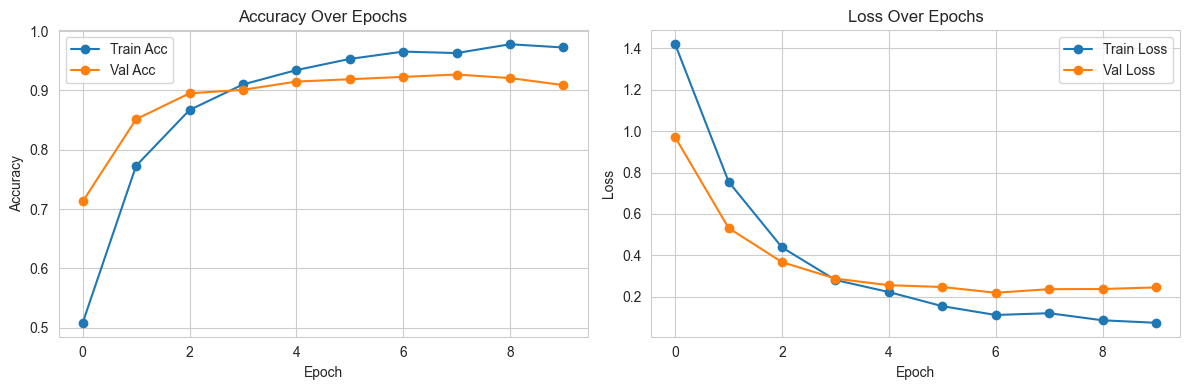

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetV2B2
import tensorflow as tf
import pickle

# Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Load Pretrained EfficientNetV2B2 with matching input size
base_model = EfficientNetV2B2(
    include_top=False,
    input_shape=(224, 224, 3),
    include_preprocessing=True,
    weights='imagenet'
)

# Freeze early layers
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# Build Final Model
model = Sequential([
    layers.Input(shape=(224, 224, 3)),
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')
])

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = callbacks.ModelCheckpoint(
    filepath='best_model224.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Pre-training Summary
epochs = 15
print("\n📦 Starting Model Training...")
print(f"Epochs       : {epochs}")
print(f"Class Weights: {class_weights}")
print(f"Checkpoint   : Best model saved to 'best_model224.keras'")
print(f"Early Stop   : Enabled with patience=3\n")

# Train the Model with Tqdm progress bar
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    class_weight=class_weights,
    batch_size=32,
    callbacks=[early, checkpoint, TqdmCallback(verbose=1)]
)

# Display training log as a table
df_log = pd.DataFrame(history.history)
print("\n📊 Training Log Summary:")
print(df_log.to_string(index=True))

# Save history for later comparison
with open("history224.pkl", "wb") as f:
    pickle.dump(history.history, f)

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# 👁️ View Base Model Summary (EfficientNetV2B2 without classification head)
print("\n📌 Base Model (EfficientNetV2B2) Summary:")
base_model.summary()



📌 Base Model (EfficientNetV2B2) Summary:


Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_2 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_2               │ (None, 224, 224, 3)       │               0 │ rescaling_2[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ normalization_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 112, 112, 16)      │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 112, 112, 16)      │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 112, 112, 16)      │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_conv (Conv2D) │ (None, 112, 112, 16)      │           2,304 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_bn            │ (None, 112, 112, 16)      │              64 │ block1b_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_project_activation    │ (None, 112, 112, 16)      │               0 │ block1b_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_drop (Dropout)        │ (None, 112, 112, 16)      │               0 │ block1b_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1b_add (Add)             │ (None, 112, 112, 16)      │               0 │ block1b_drop[0][0],        │
│                               │                           │                 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 7,966,188 (30.39 MB)

 Non-trainable params: 803,186 (3.06 MB)

In [12]:
# 👁️ View Final Model Summary (with Data Augmentation, GAP, Dropout, Dense)
print("\n📌 Final Model (Full Architecture) Summary:")
model.summary()



📌 Final Model (Full Architecture) Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b2 (Functional)       │ (None, 7, 7, 1408)          │       8,769,374 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1408)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           8,454 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,727,114 (94.33 MB)

 Trainable params: 7,974,642 (30.42 MB)

 Non-trainable params: 803,186 (3.06 MB)

 Optimizer params: 15,949,286 (60.84 MB)

### 🧠 Step 10: Train the Model  
Fit the model to training data.  
Validates on validation dataset.  


In [13]:
# Evaluate the best saved model on the test set
model = tf.keras.models.load_model('best_model224.keras')

# Evaluate
loss, acc = model.evaluate(test_ds_eval, verbose=2)
print(f"\n✅ Test Accuracy : {acc * 100:.2f}%")
print(f"📉 Test Loss     : {loss:.4f}")


8/8 - 20s - 3s/step - accuracy: 0.9336 - loss: 0.2207

✅ Test Accuracy : 93.36%
📉 Test Loss     : 0.2207


### 🧠 Step 10: Train the Model  
Fit the model to training data.  
Validates on validation dataset.  


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds_eval:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

📄 Classification Report:
              precision    recall  f1-score   support

   cardboard       0.96      0.89      0.93        28
       glass       0.98      0.95      0.96        55
       metal       0.95      0.95      0.95        44
       paper       0.95      0.94      0.94        63
     plastic       0.95      0.89      0.92        47
       trash       0.70      1.00      0.83        19

    accuracy                           0.93       256
   macro avg       0.92      0.94      0.92       256
weighted avg       0.94      0.93      0.94       256



### 📈 Step 11: Training Graphs  
Plots training vs validation accuracy/loss.  
Helps visualize overfitting or underfitting.  
### 📏 Step 12: Evaluate on Test Data  
Evaluate model on unseen data.  
Returns accuracy, loss, etc.  
### 🔍 Step 13: Confusion Matrix  
Visualizes correct and incorrect predictions across classes.  


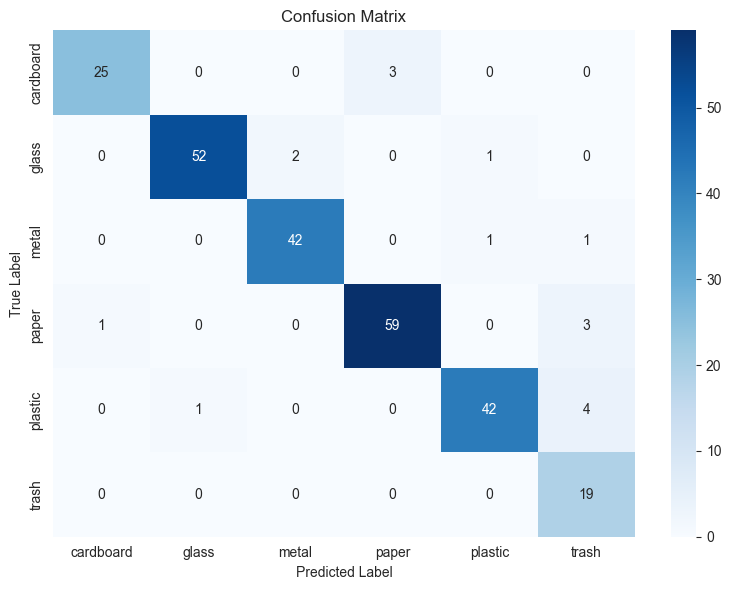

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


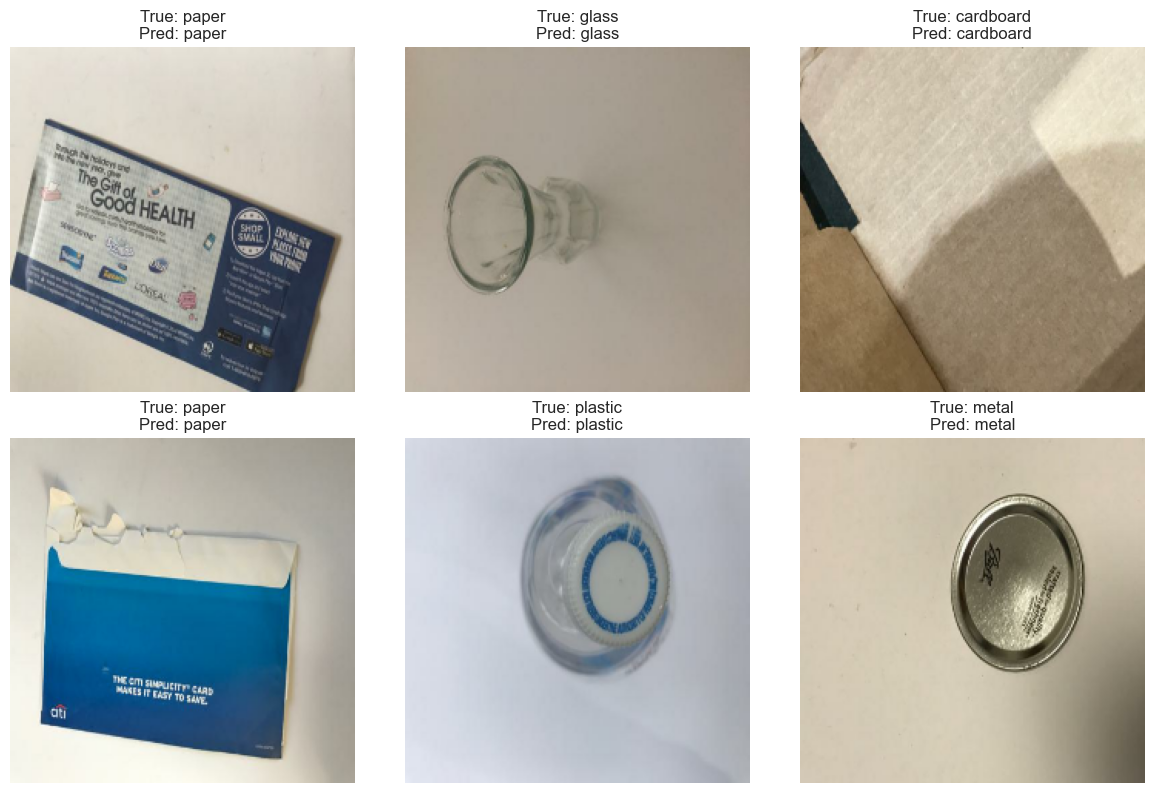

In [16]:
import random

# Take a batch from test set
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 8))
    for i in range(6):
        idx = random.randint(0, len(images) - 1)
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[idx].numpy().astype("uint8"))
        plt.title(f"True: {class_names[labels[idx]]}\nPred: {class_names[pred_labels[idx]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [6]:
import tensorflow as tf
import pickle
import pandas as pd

# === Paths ===
model_path = 'best_model224.keras'       # Change to your actual model file if needed
history_path = 'history224.pkl'          # Change to your actual history file if needed

# === Load the model ===
model = tf.keras.models.load_model(model_path)
print(f"✅ Loaded model from: {model_path}")

# === Load training history ===
with open(history_path, 'rb') as f:
    history = pickle.load(f)

# === Extract final epoch metrics ===
final_accuracy     = history['accuracy'][-1]
final_val_accuracy = history['val_accuracy'][-1]
final_loss         = history['loss'][-1]
final_val_loss     = history['val_loss'][-1]

# === Print final summary ===
print("\n📊 Final Training Summary:")
print(f"Train Accuracy     : {final_accuracy:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Train Loss         : {final_loss:.4f}")
print(f"Validation Loss    : {final_val_loss:.4f}")


✅ Loaded model from: best_model224.keras

📊 Final Training Summary:
Train Accuracy     : 0.9723
Validation Accuracy: 0.9089
Train Loss         : 0.0734
Validation Loss    : 0.2446


C:\Users\S&P\AppData\Local\Temp\ipykernel_7376\573850619.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\S&P\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


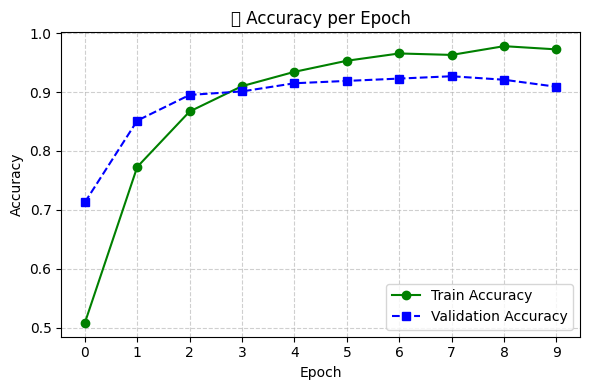

In [7]:
import pickle
import matplotlib.pyplot as plt

# Load history
with open("history224.pkl", "rb") as f:
    history = pickle.load(f)

# Accuracy values
acc = history['accuracy']
val_acc = history['val_accuracy']
epochs = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs, acc, label='Train Accuracy', color='green', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='blue', marker='s', linestyle='--')
plt.title('📈 Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(epochs)
plt.tight_layout()
plt.show()


C:\Users\S&P\AppData\Local\Temp\ipykernel_7376\3107266992.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\S&P\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


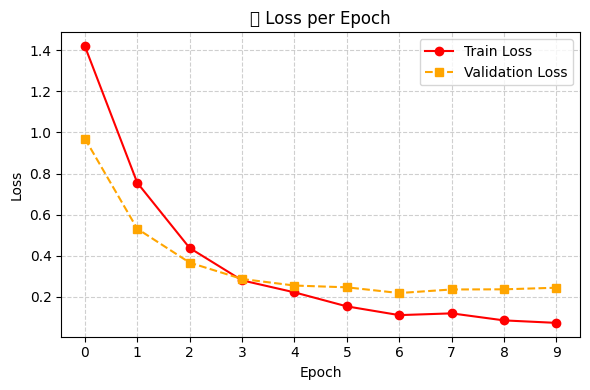

In [8]:
# Loss values
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(loss))

# Plot Loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, loss, label='Train Loss', color='red', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='s', linestyle='--')
plt.title('📉 Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(epochs)
plt.tight_layout()
plt.show()


### 🌐 Step 14: Deploy with Gradio  
Creates a simple web interface where user can upload image and see prediction.  


In [15]:
pip install --upgrade gradio

Note: you may need to restart the kernel to use updated packages.


In [4]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load model
model = tf.keras.models.load_model("best_model224.keras")
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def predict_image(img):
    img = img.resize((224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = {class_names[i]: float(f"{predictions[0][i]:.4f}") for i in range(len(class_names))}
    return predicted_class, confidence

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Image"),  # no webcam
    outputs=[gr.Label(num_top_classes=1), gr.Label()],
    title="🗑️ Garbage Classifier",
    description="Upload an image to classify garbage type."
)

interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://7e40be1a8d695dfd9c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
